In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

from sklearn.decomposition import PCA


import sweetviz as sv



## Load Data

In [2]:
data = pd.read_csv('dat/online_shoppers_intention.csv.gz')

## Data is loaded correctly

In [3]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
numerical_features = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                      'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
                      'SpecialDay']

In [5]:
categorical_features = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
                        'Weekend', 'Revenue']

## Binary variable is imbalanced, specifically 84.5% of user journeys did NOT result in a purchase, or 15.5% did

In [6]:
print(np.round(data['Revenue'].mean(), 3) * 100,'%')

15.5 %


### Everything look ok

In [7]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [8]:
data.shape

(12330, 18)

### Dataset is clean, no nan or null values

In [9]:
pd.isna(data).mean()

Administrative             0.0
Administrative_Duration    0.0
Informational              0.0
Informational_Duration     0.0
ProductRelated             0.0
ProductRelated_Duration    0.0
BounceRates                0.0
ExitRates                  0.0
PageValues                 0.0
SpecialDay                 0.0
Month                      0.0
OperatingSystems           0.0
Browser                    0.0
Region                     0.0
TrafficType                0.0
VisitorType                0.0
Weekend                    0.0
Revenue                    0.0
dtype: float64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [11]:
for col in data.columns:
    print(col)
    print(data[col].unique())

Administrative
[ 0  1  2  4 12  3 10  6  5  9  8 16 13 11  7 18 14 17 19 15 24 22 21 20
 23 27 26]
Administrative_Duration
[  0.         53.         64.6       ... 167.9107143 305.125
 150.3571429]
Informational
[ 0  1  2  4 16  5  3 14  6 12  7  9 10  8 11 24 13]
Informational_Duration
[  0.   120.    16.   ... 547.75 368.25 211.25]
ProductRelated
[  1   2  10  19   0   3  16   7   6  23  13  20   8   5  32   4  45  14
  52   9  46  15  22  11  12  36  42  27  90  18  38  17 128  25  30  21
  51  26  28  31  24  50  96  49  68  98  67  55  35  37  29  34  71  63
  87  40  33  54  64  75  39 111  81  61  47  44  88 149  41  79  66  43
 258  80  62  83 173  48  58  57  56  69  82  59 109 287  53  84  78 137
 113  89  65  60 104 129  77  74  93  76  72 194 140 110 132 115  73 328
 160  86 150  95 130 151 117 124 127 125 116 105  92 157 154 220 187 112
 131 159  94 204 142 206 102 313 145  85  97 198 181 126 106 101 108 119
  70 122  91 276 100 291 114 172 217 141 133 156 136 180 135 195 

## Why not use the amazing SweetViz?

                                             |                                                                …


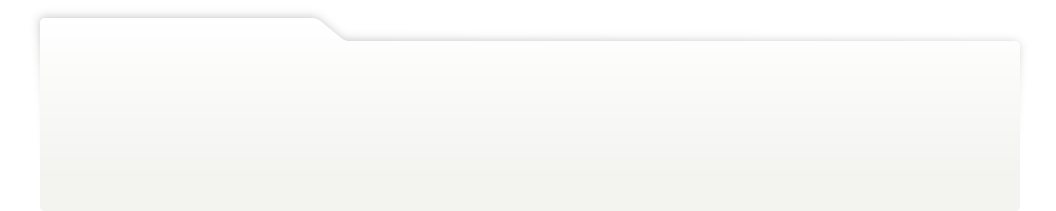
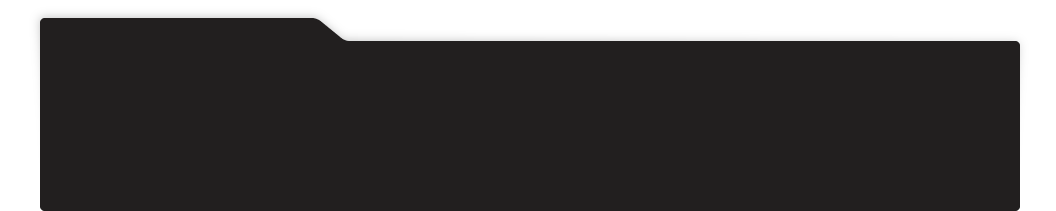
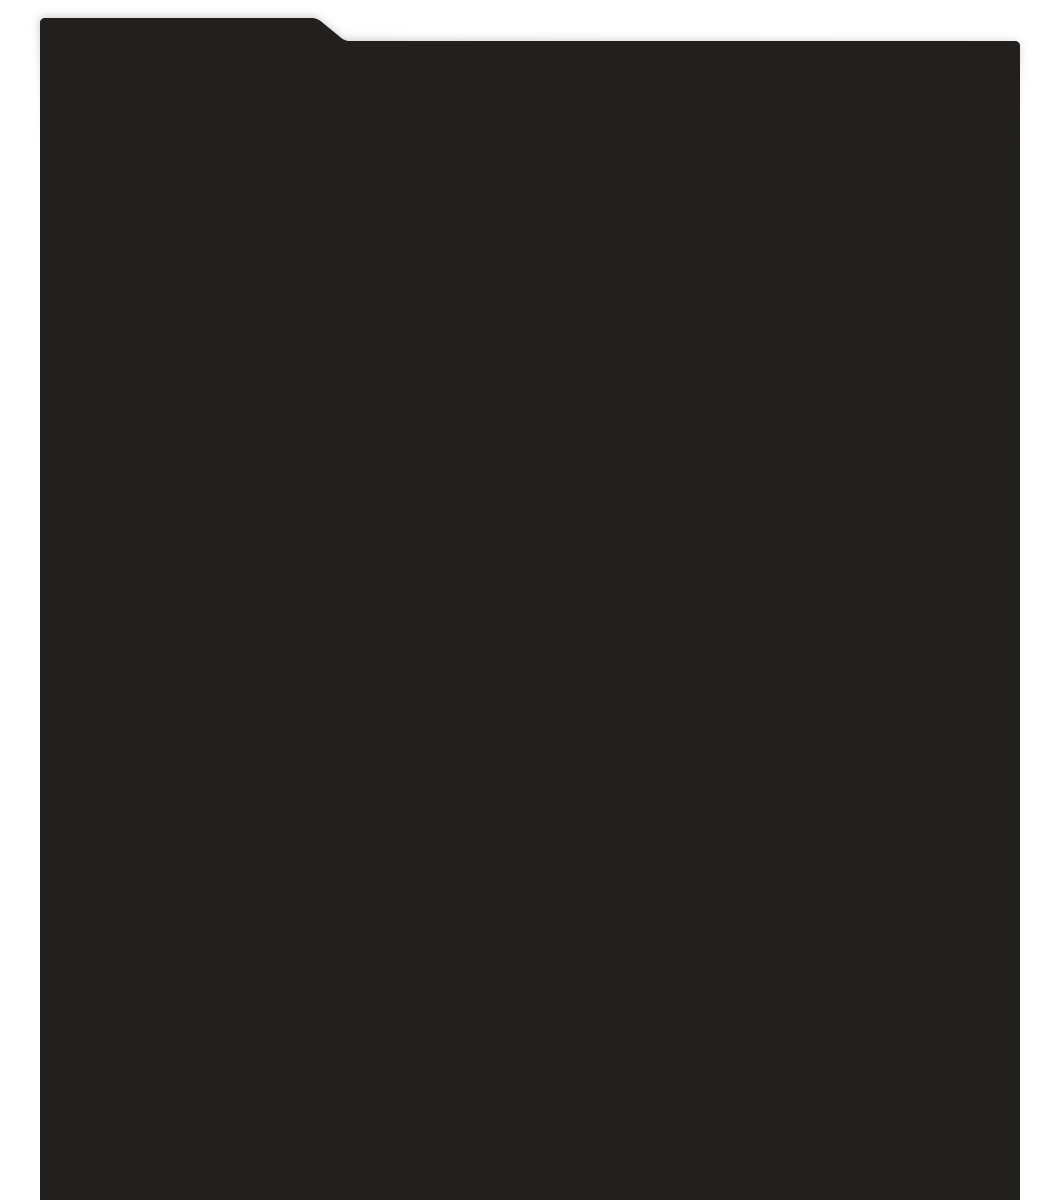
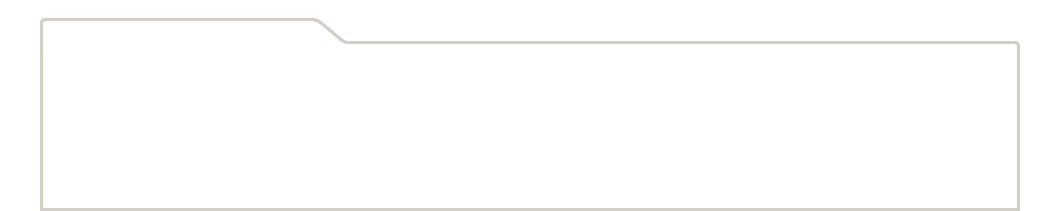
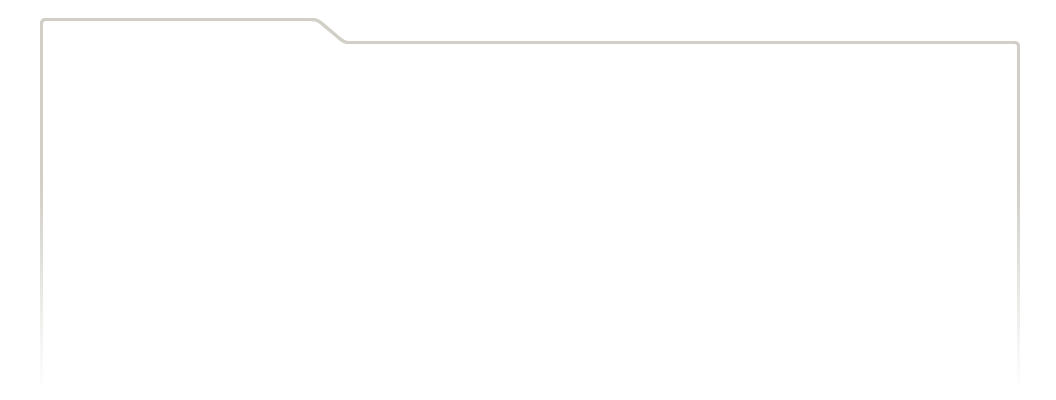
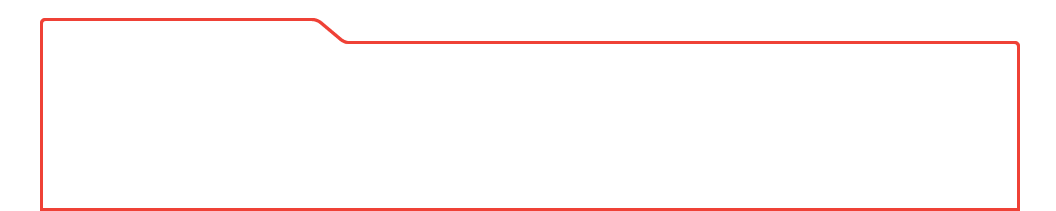
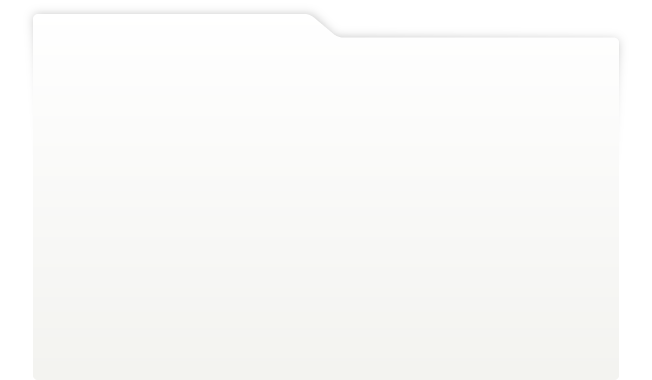
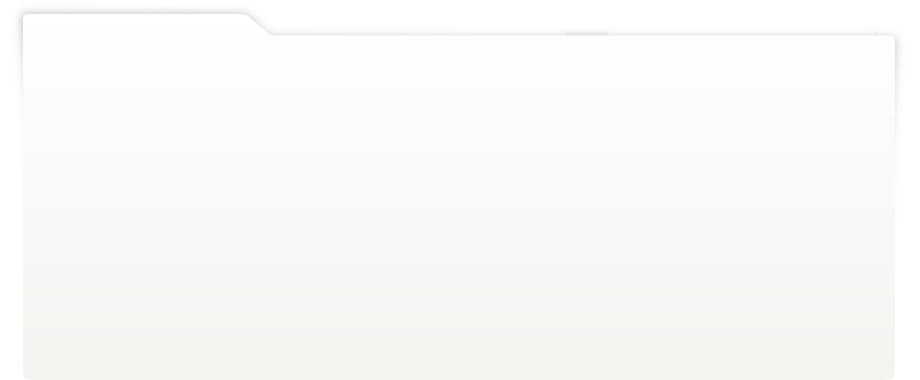
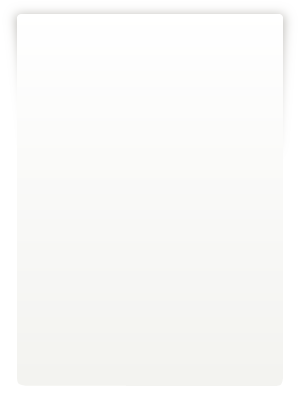
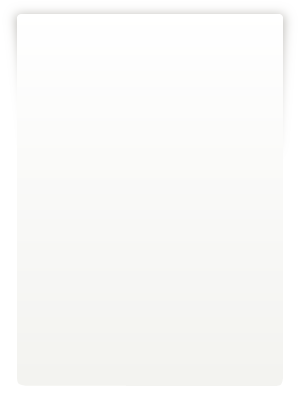
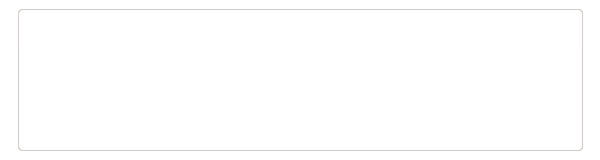
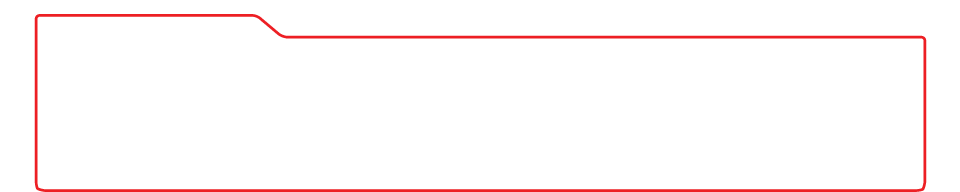
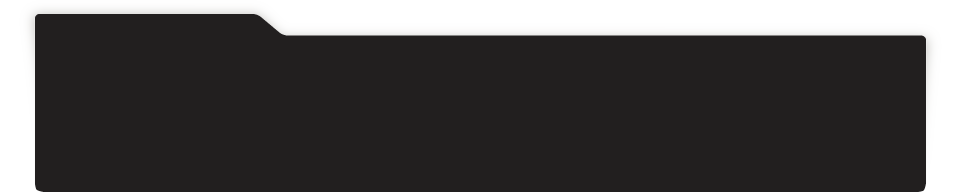
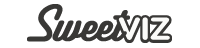
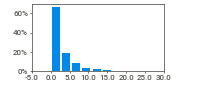
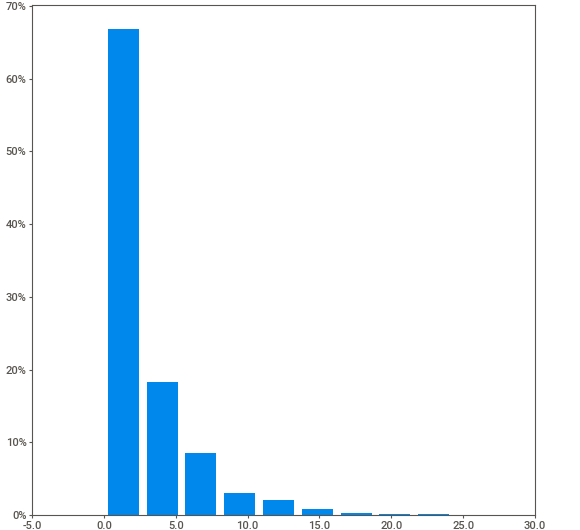
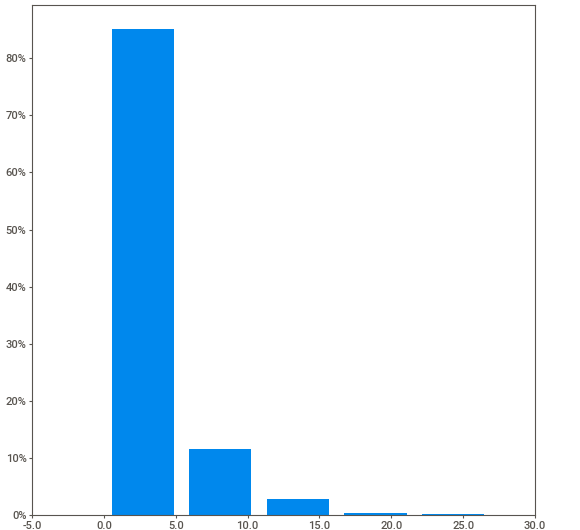
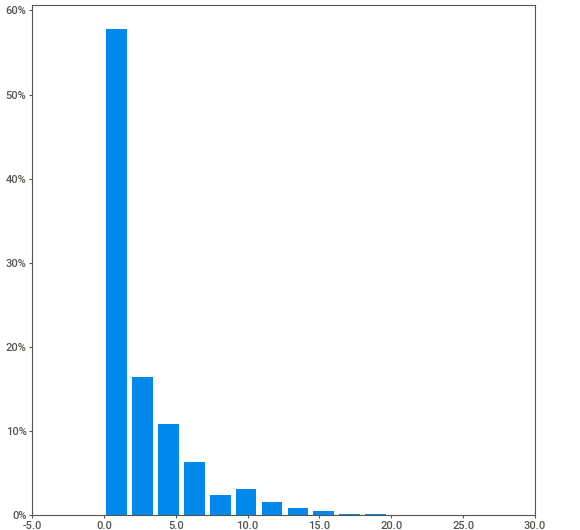
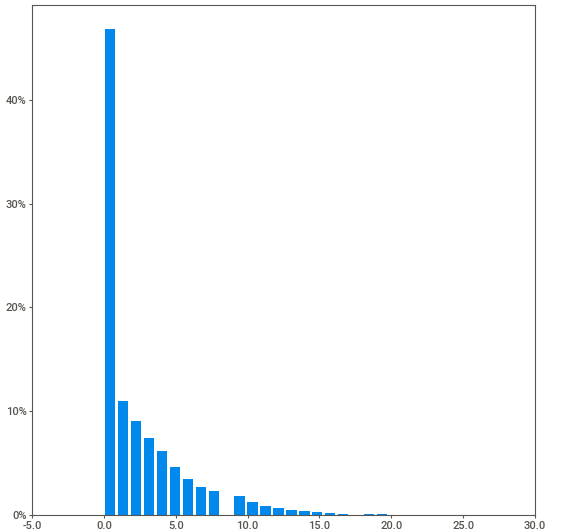
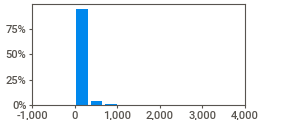
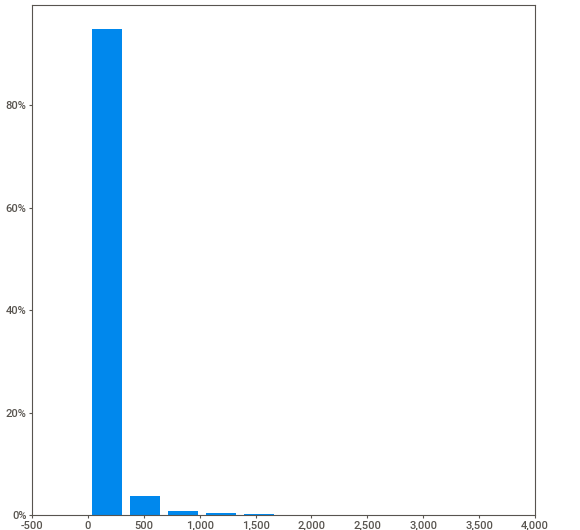
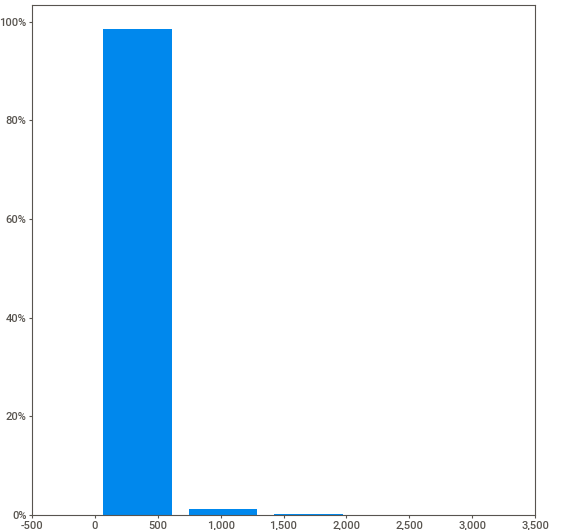
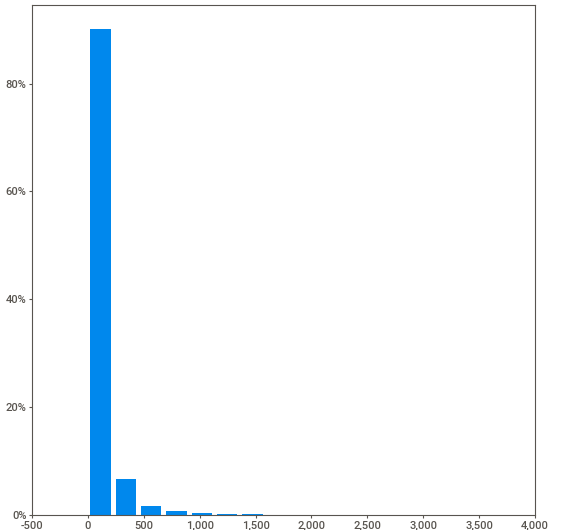
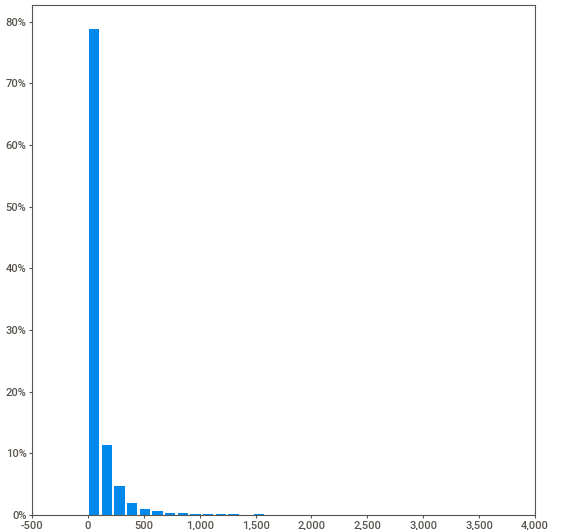
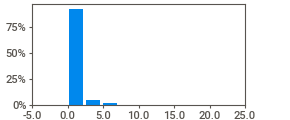
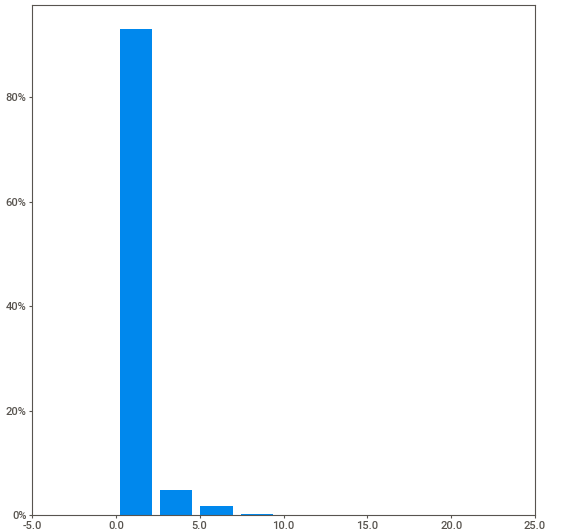
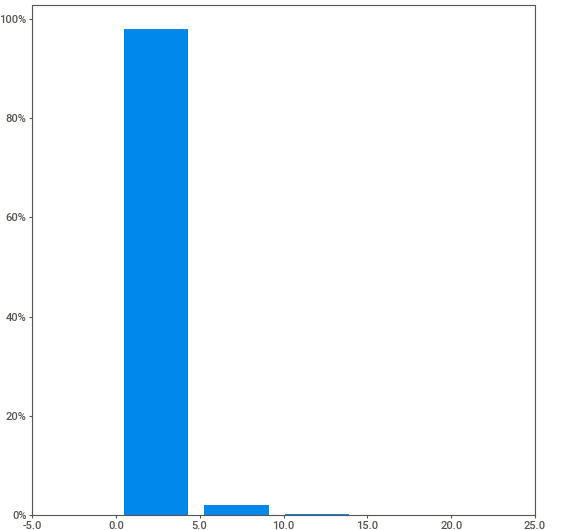
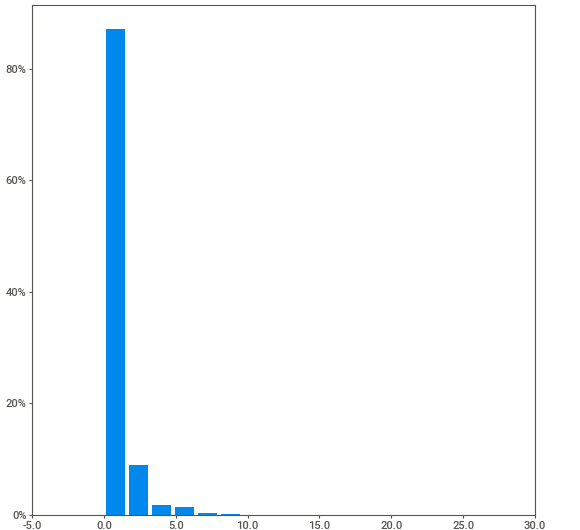
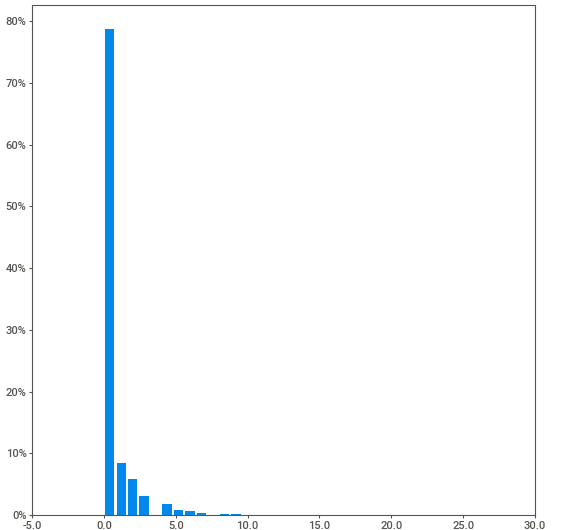
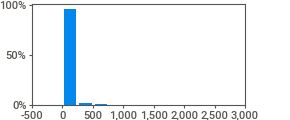
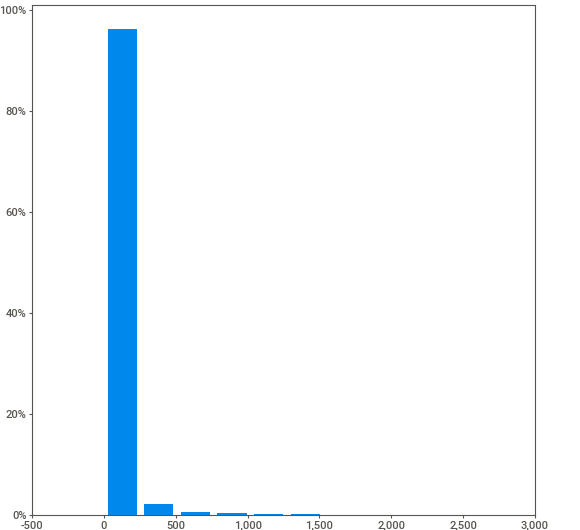
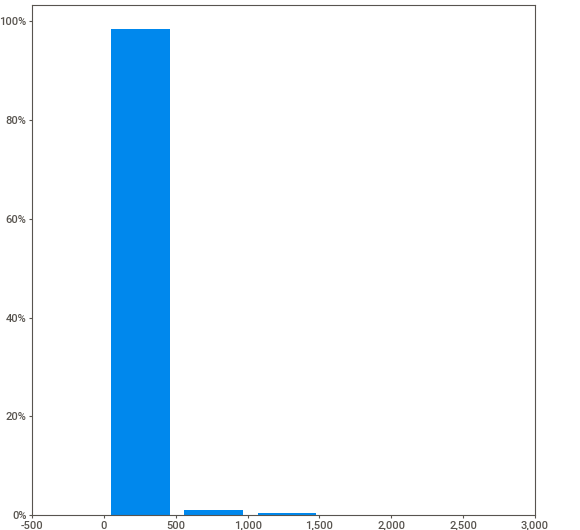
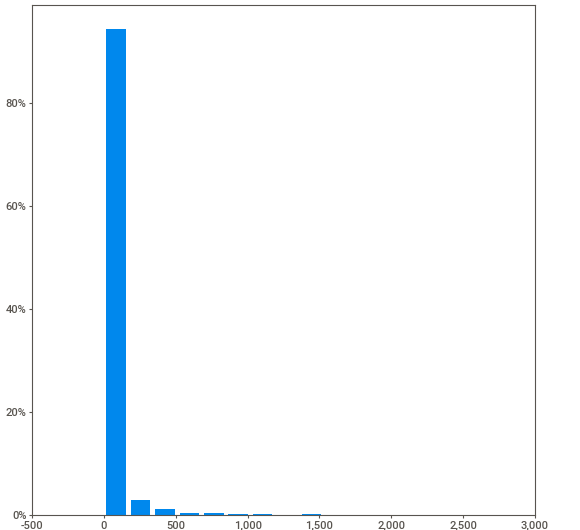
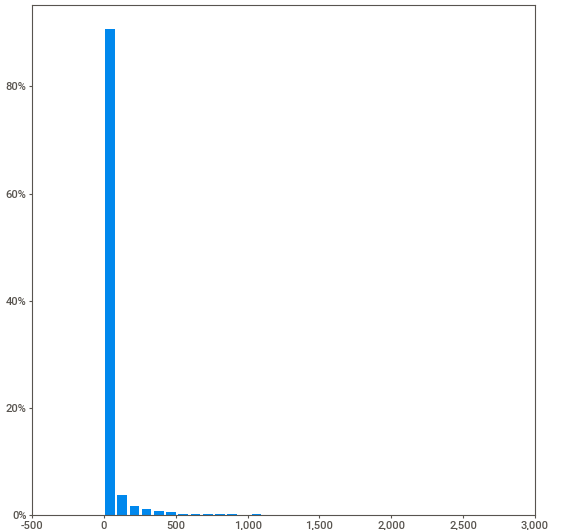
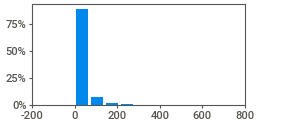
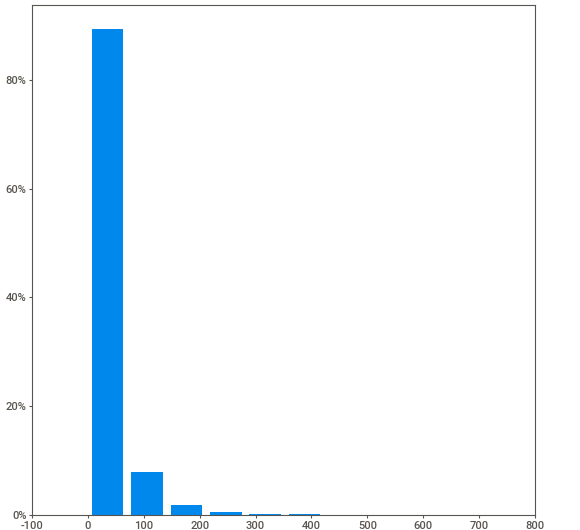
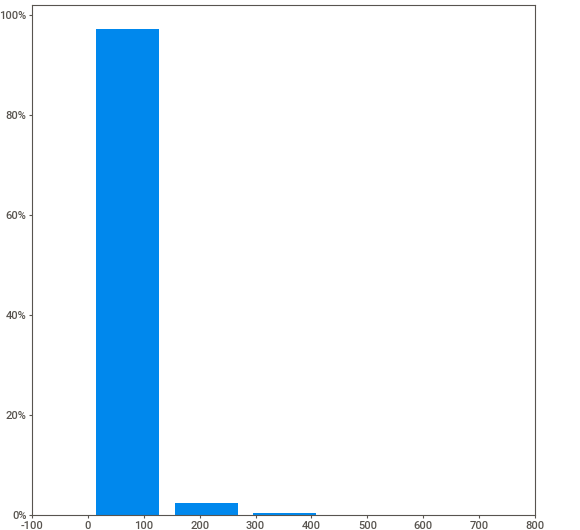
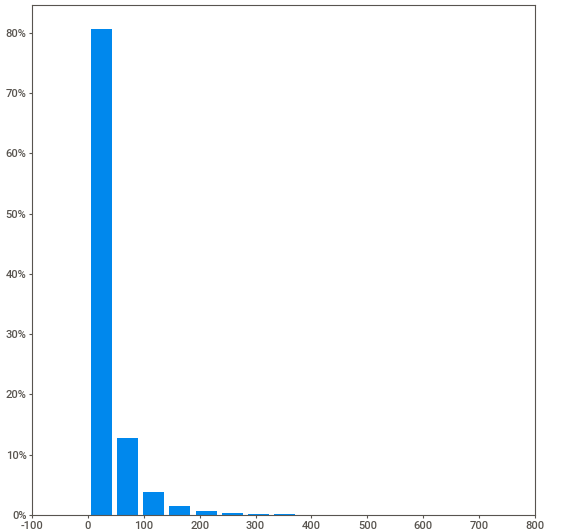
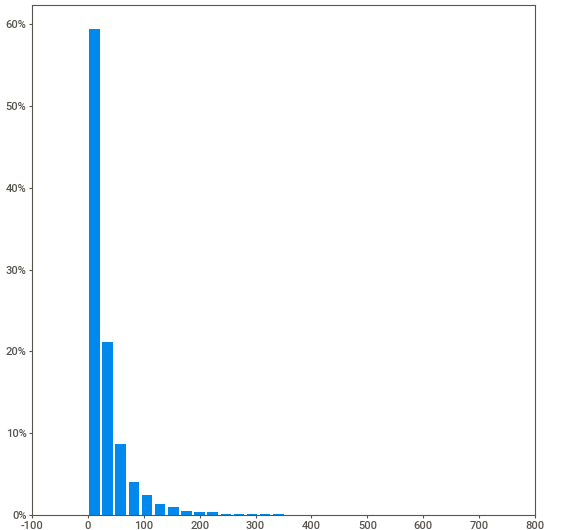
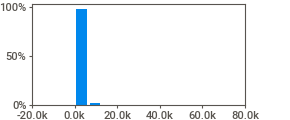
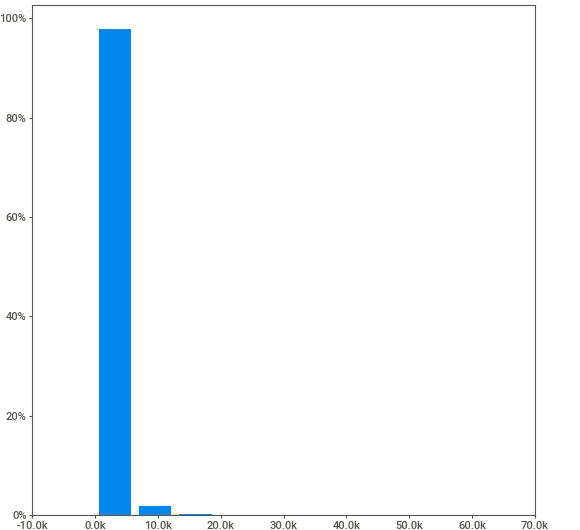
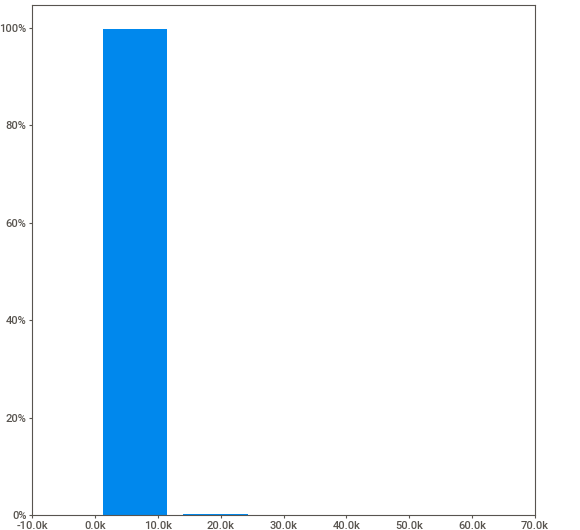
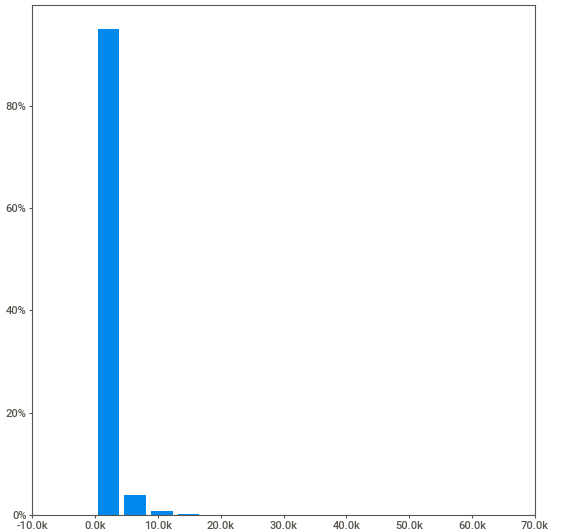
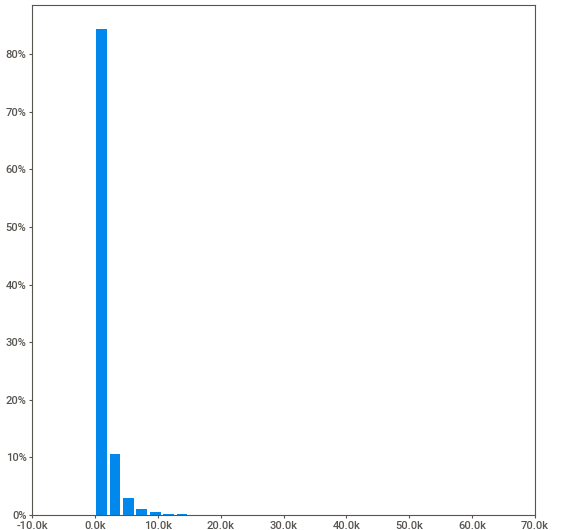
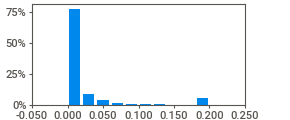
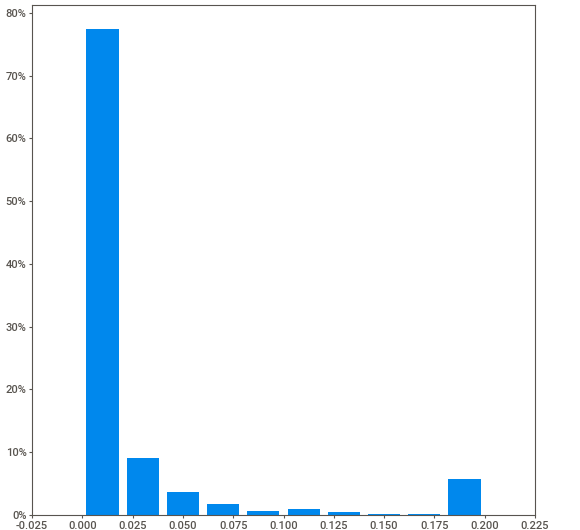
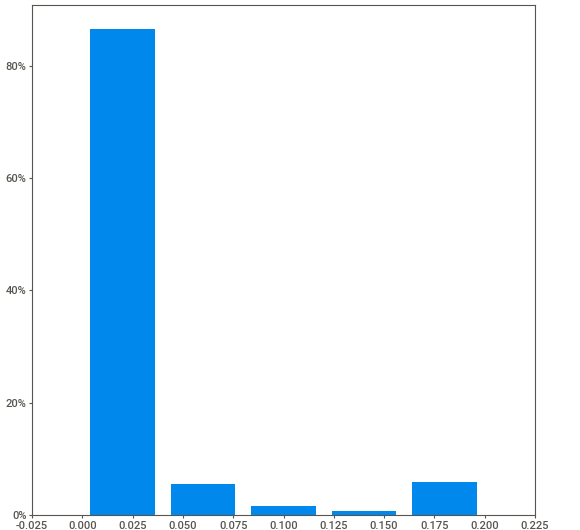
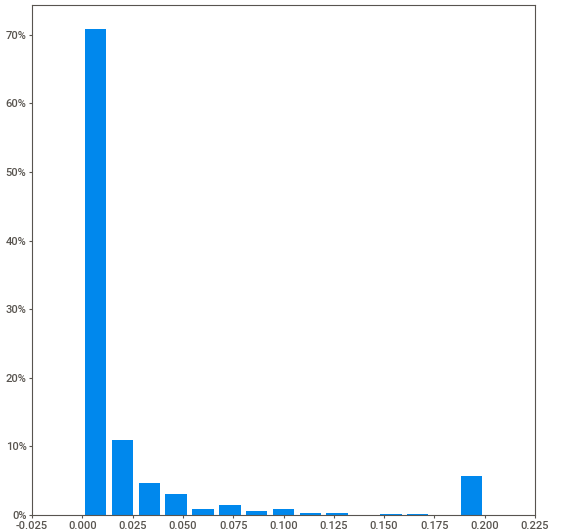
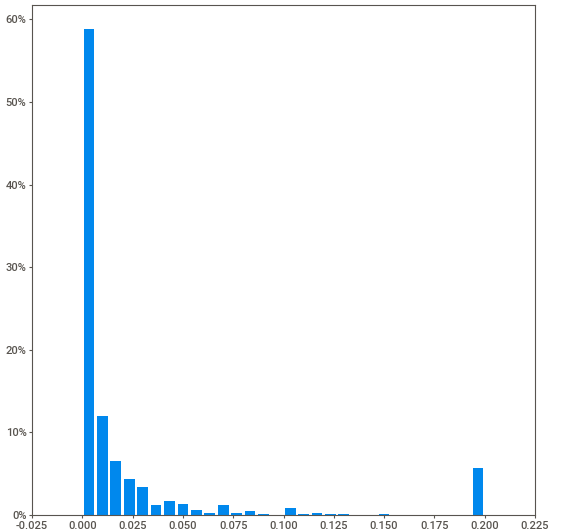
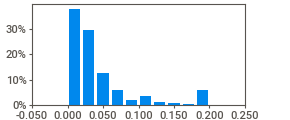
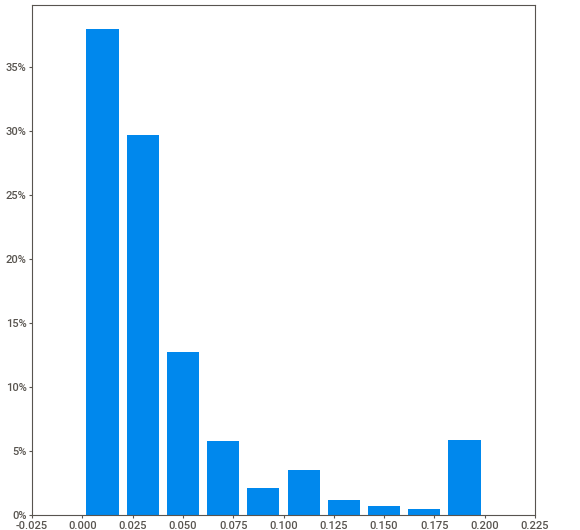
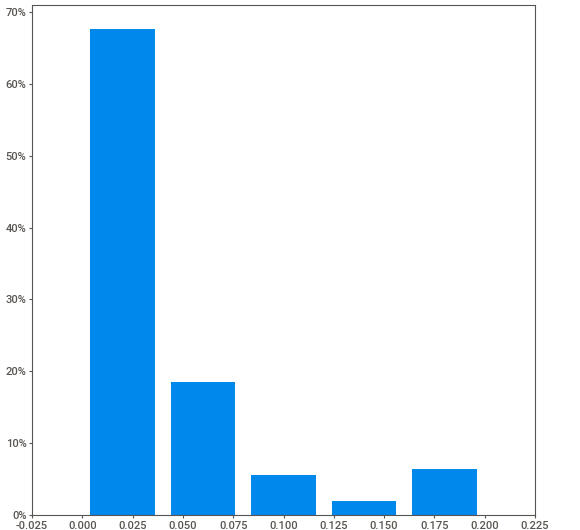
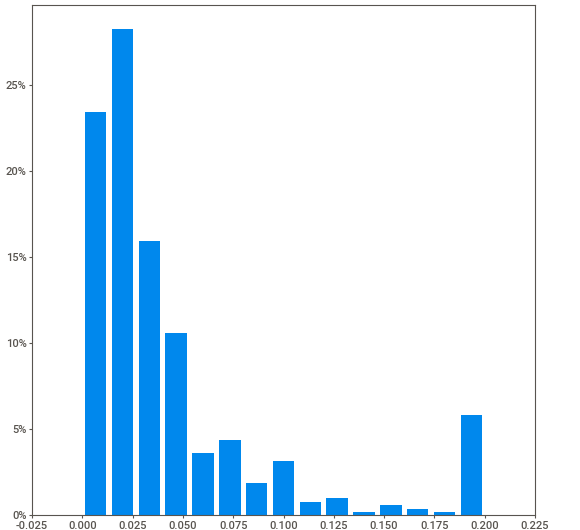
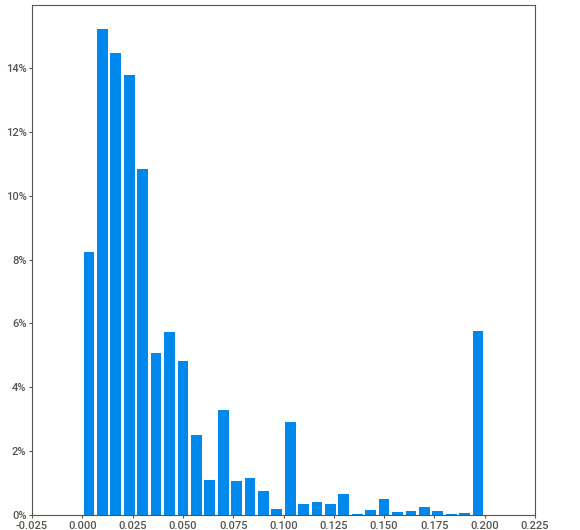
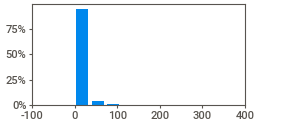
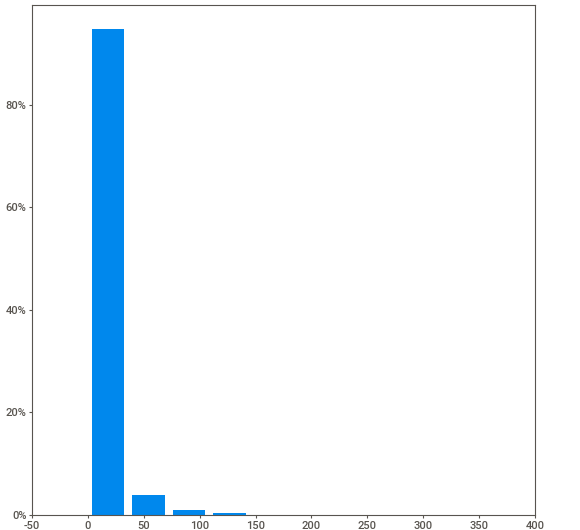
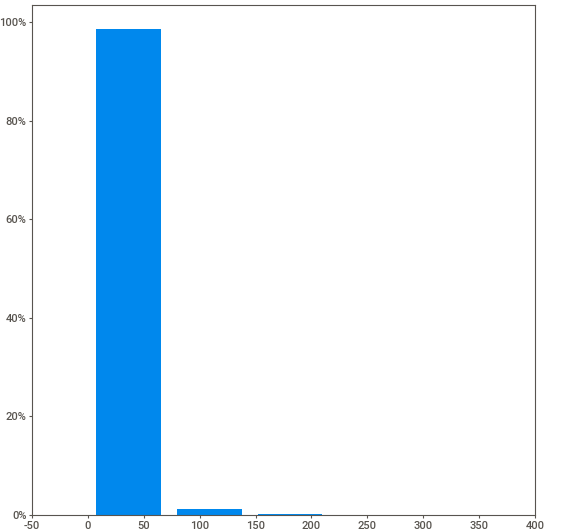
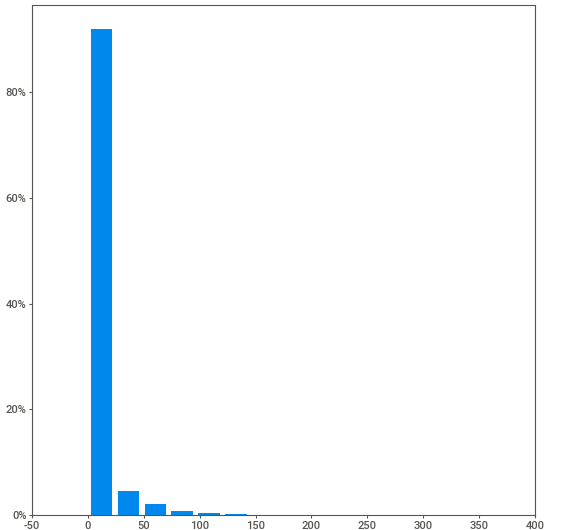
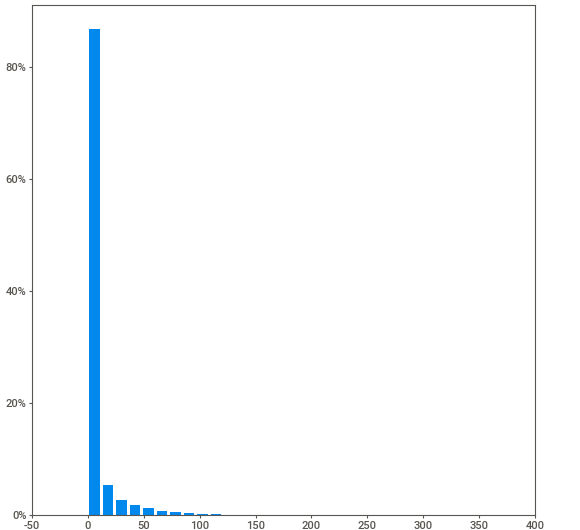
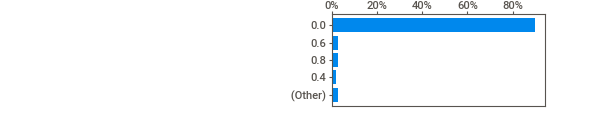
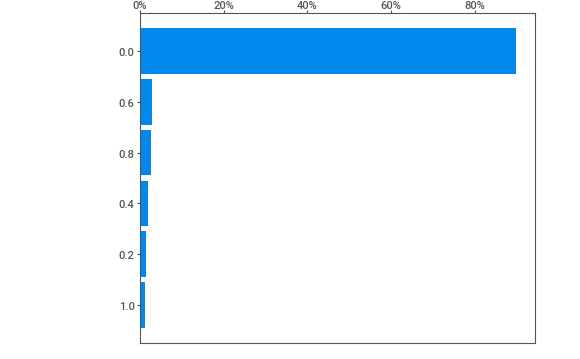
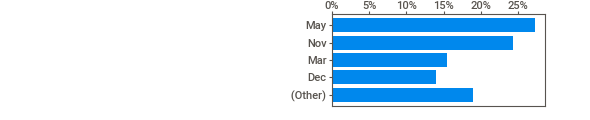
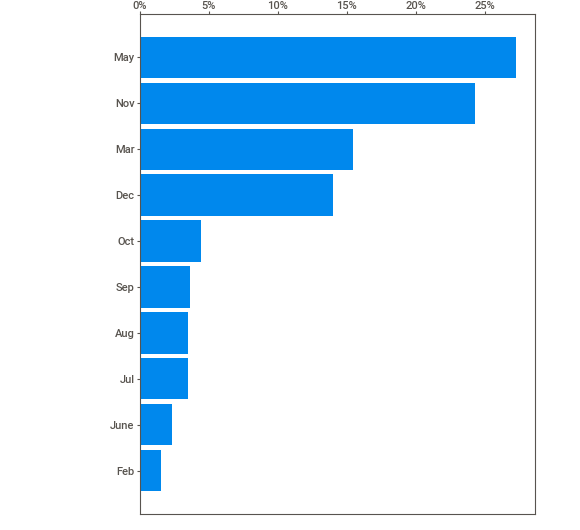
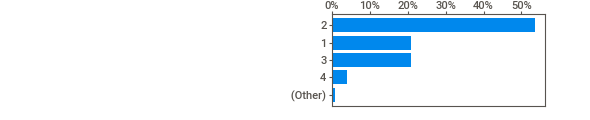
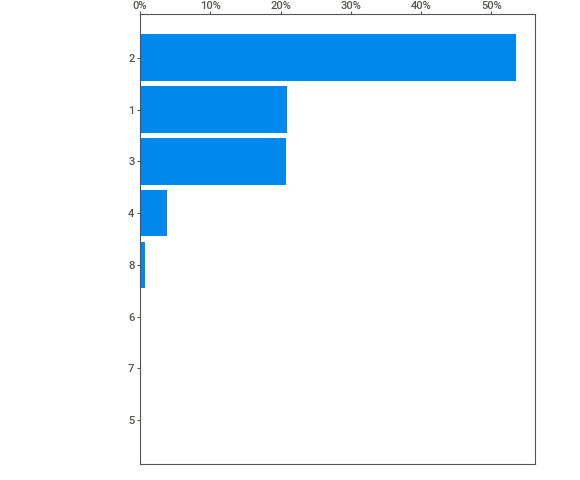
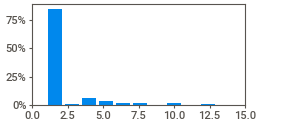
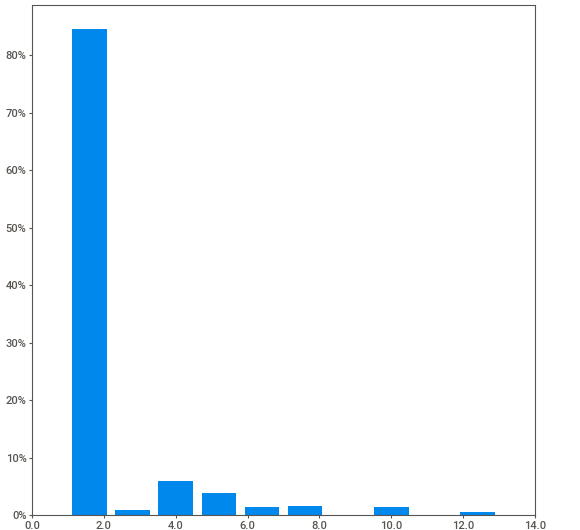
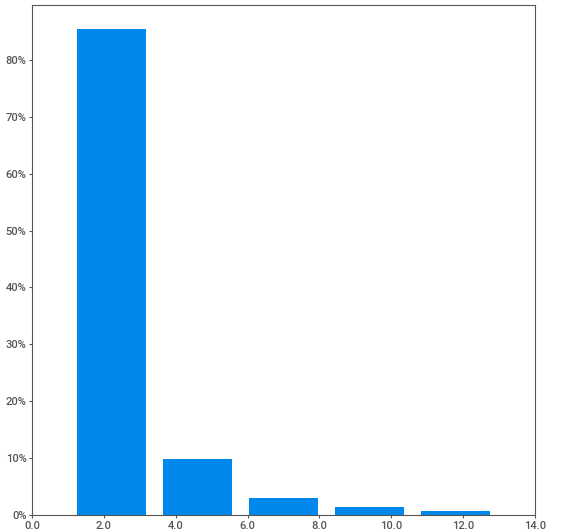
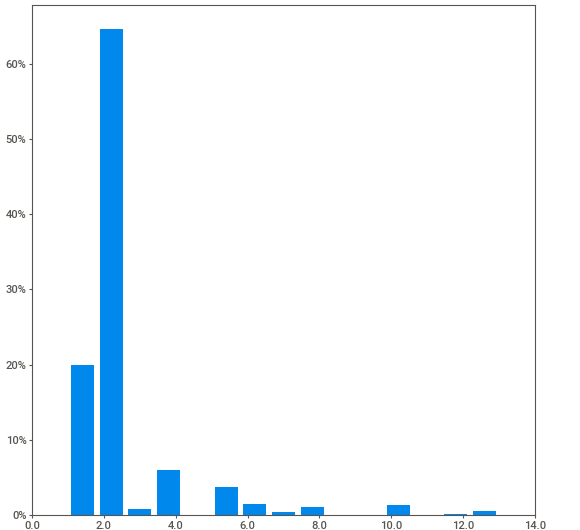
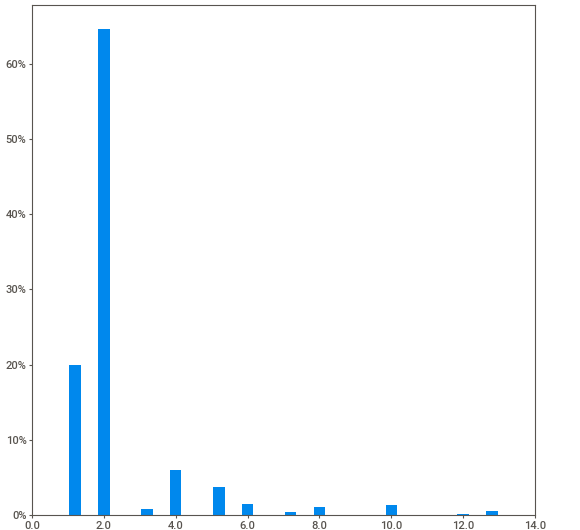
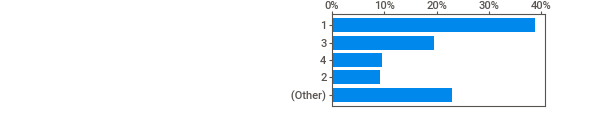
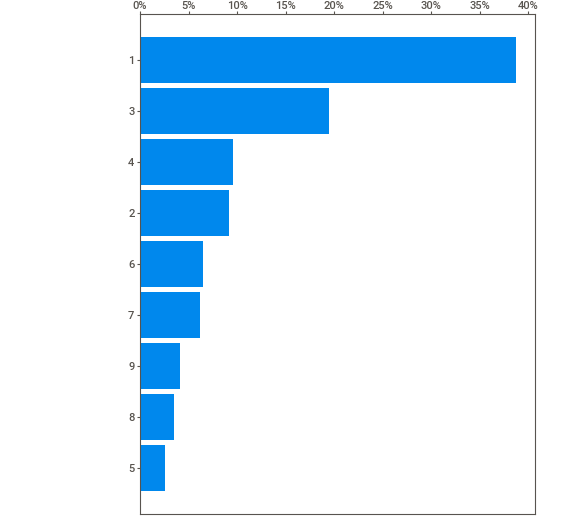
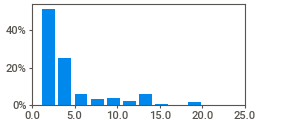
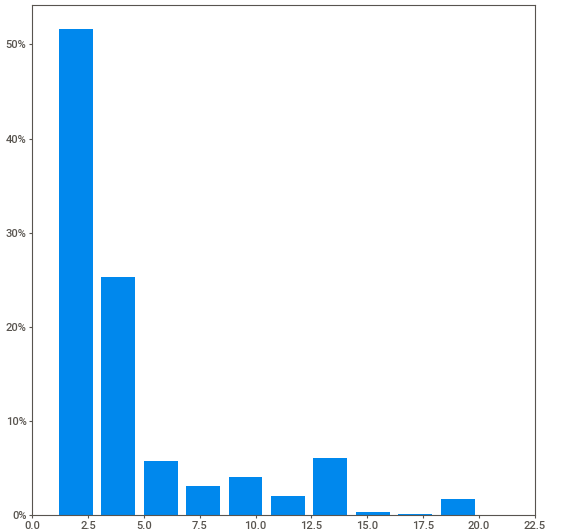
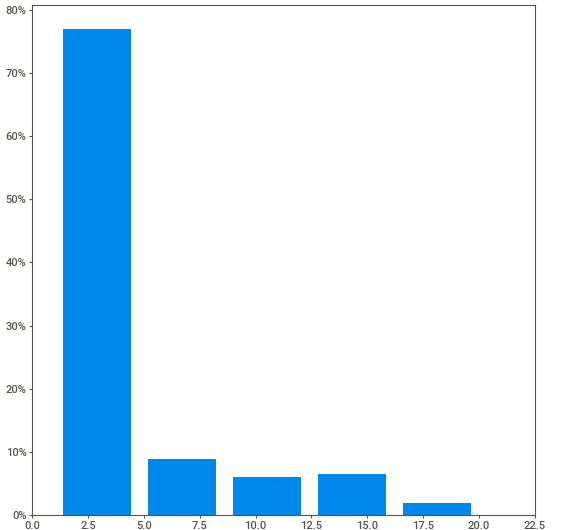
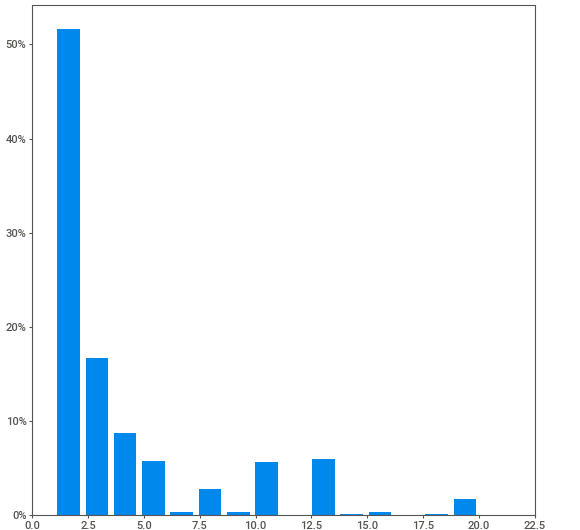
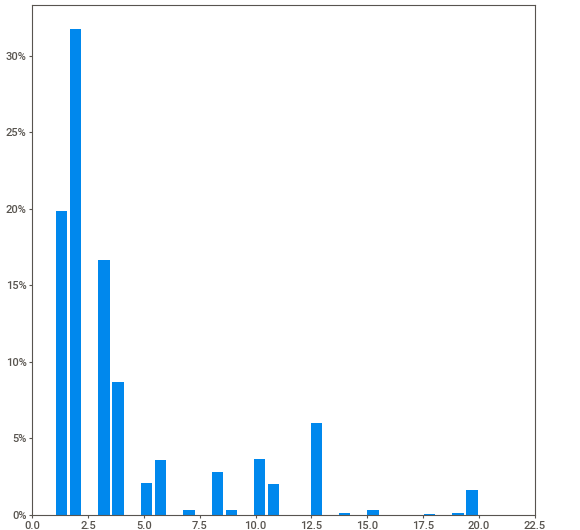
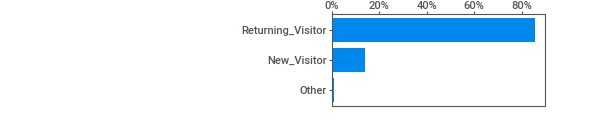
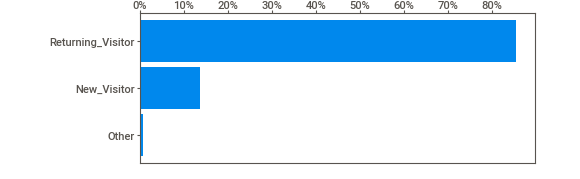
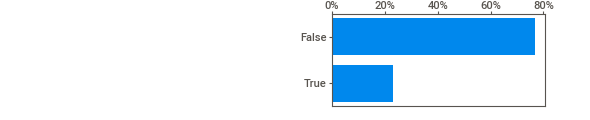
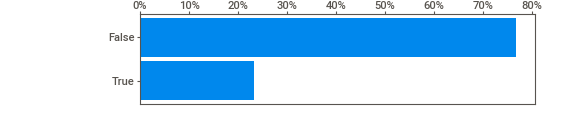
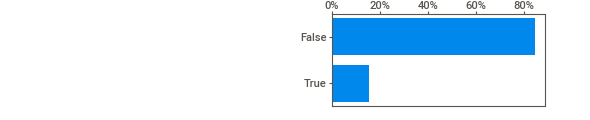
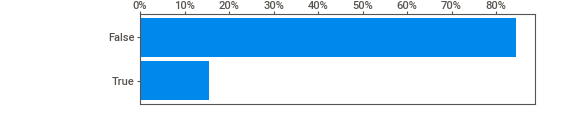
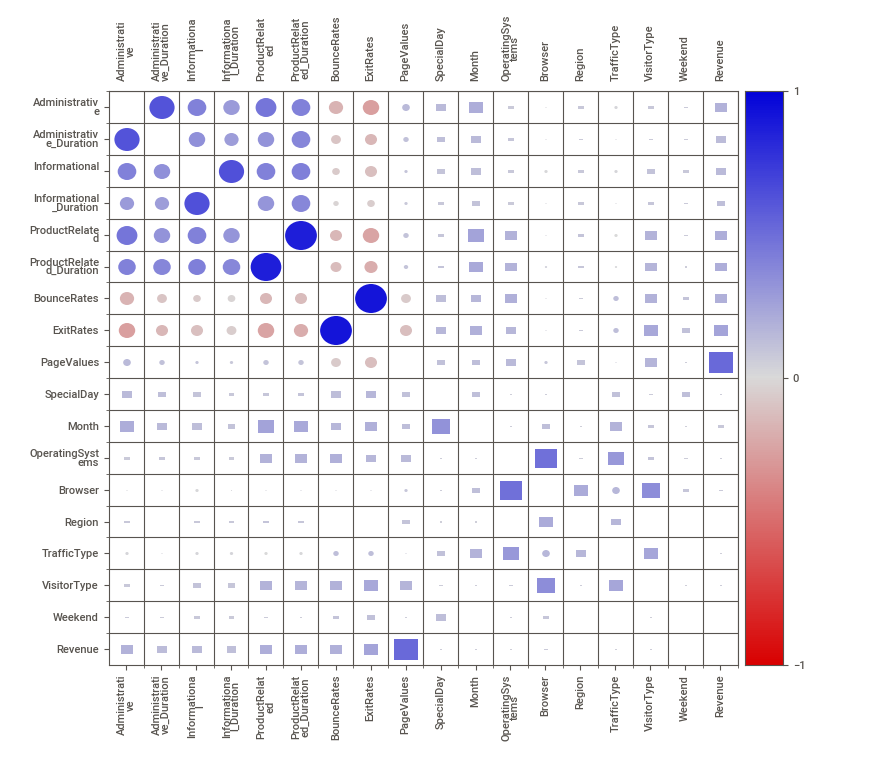
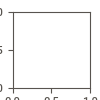

In [12]:
data_report = sv.analyze(data)
data_report.show_notebook()

In [13]:
#sns.pairplot(data[['Administrative', 'Administrative_Duration', 'Month', 'VisitorType']], diag_kind='kde');

In [14]:
#sns.countplot(x="Month", data=data)

                               Visualising Categorical Features:                                


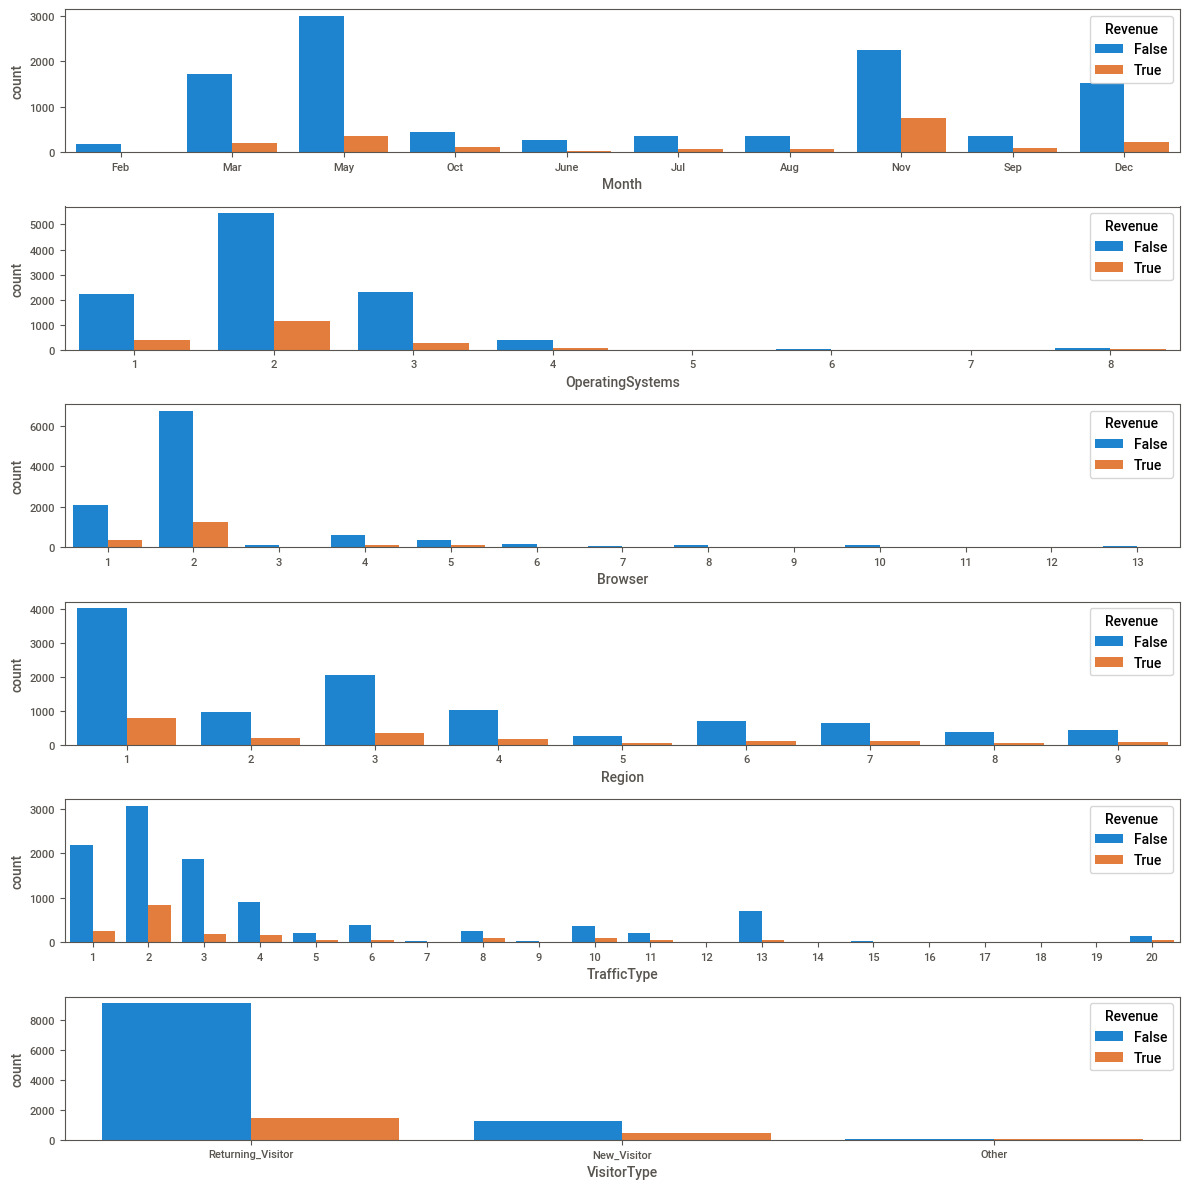

In [15]:
#Visualising the categorical features 

print('\033[1mVisualising Categorical Features:'.center(100))

plt.figure(figsize=(12,12))

categorical_features1 = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType']

for i in range(len(categorical_features1)):
    plt.subplot(6,1,i+1)
    #sns.countplot(data=data[categorical_features[i]])
    sns.countplot(x=data[categorical_features1[i]],hue='Revenue', data=data)
plt.tight_layout();

## Revenue variable variation across the months

In [16]:
data_copy = data.copy(deep =True)

In [17]:
df_mapping = pd.DataFrame({'Month': ['Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov',  'Dec']})

In [18]:
sort_mapping = df_mapping.reset_index().set_index('Month')

In [19]:
data_copy['Month_num'] = data_copy['Month'].map(sort_mapping['index'])

In [20]:
data_copy.sort_values('Month_num', inplace=True)

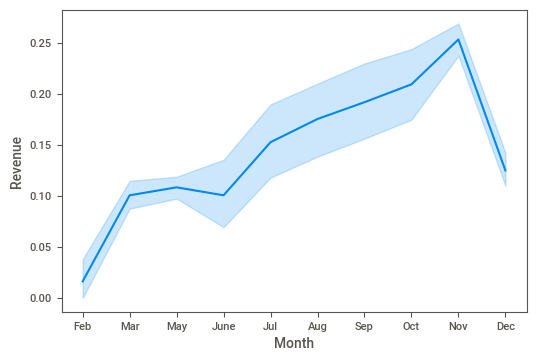

In [21]:
sns.lineplot(data=data_copy, x="Month", y="Revenue", sort=True);

In [22]:
#data.groupby(['Month'])['Revenue'].mean()

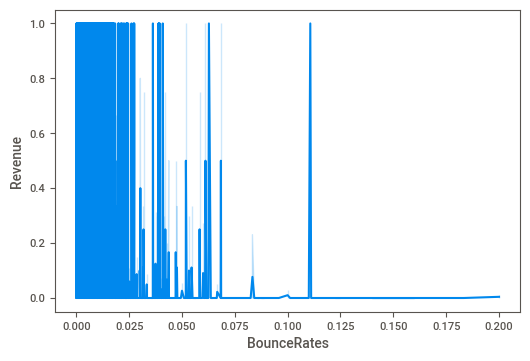

In [23]:
sns.lineplot(data=data, x="BounceRates", y="Revenue", sort=True);

### Change some categorical variables from string to int

### The Month variable will be used to split into train and test sets, we will drop it and do nothing with it now

In [24]:
data['Revenue'].replace({False: 0, True: 1}, inplace=True)

In [25]:
data['Weekend'].replace({False: 0, True: 1}, inplace=True)

In [26]:
data['VisitorType'].replace({'Returning_Visitor': 0, 'New_Visitor': 1, 'Other': 2}, inplace=True)


In [27]:
data['VisitorType'].unique()

array([0, 1, 2])

## Train/test split

In [28]:
test = data[data['Month'].isin(['Feb', 'Mar'])].copy()
test.drop(columns='Month', inplace=True)

In [29]:
train = data[data['Month'].isin(['Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep','Dec'])].copy()
train.drop(columns='Month', inplace=True)

In [30]:
print(train.shape)
print(test.shape)

(6875, 17)
(2091, 17)


In [31]:
data.shape

(12330, 18)

In [32]:
data[data['Month'].isin(['May'])].count()


Administrative             3364
Administrative_Duration    3364
Informational              3364
Informational_Duration     3364
ProductRelated             3364
ProductRelated_Duration    3364
BounceRates                3364
ExitRates                  3364
PageValues                 3364
SpecialDay                 3364
Month                      3364
OperatingSystems           3364
Browser                    3364
Region                     3364
TrafficType                3364
VisitorType                3364
Weekend                    3364
Revenue                    3364
dtype: int64

## Feature selection

<AxesSubplot:>

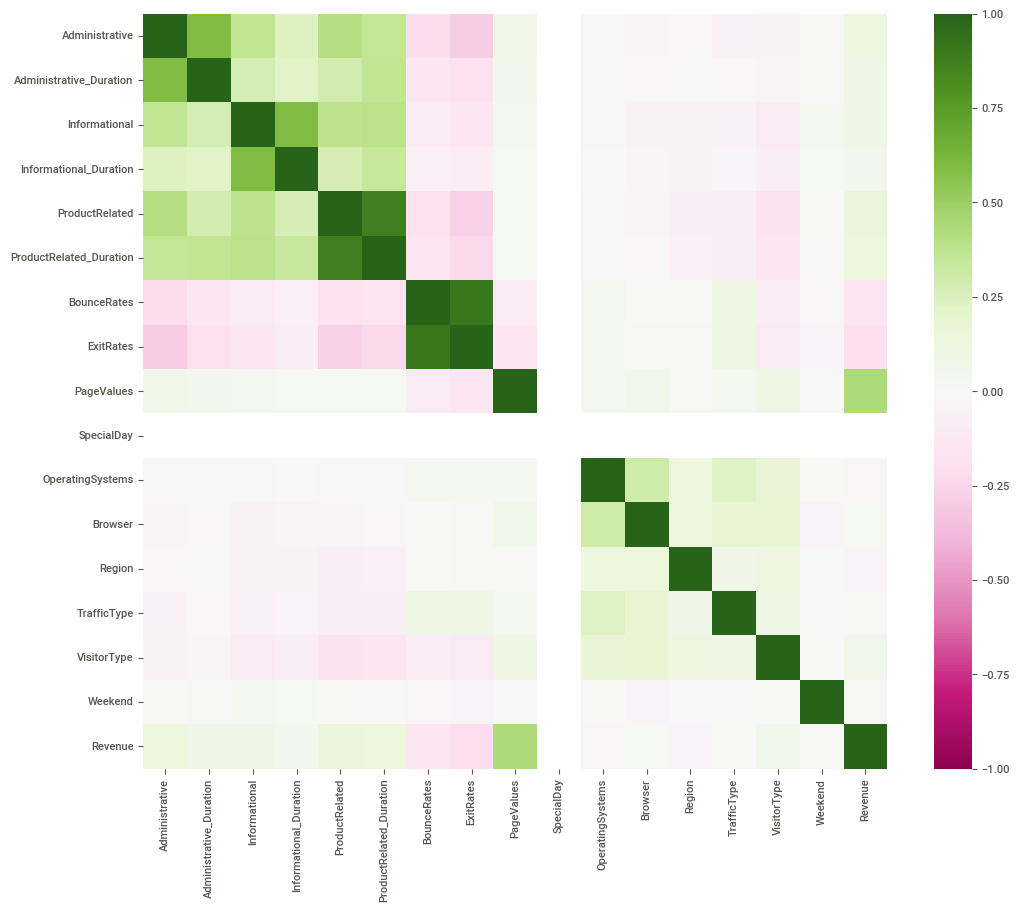

In [33]:
plt.figure(figsize=(12, 10))
cor = train.corr()
sns.heatmap(cor, vmin=-1, vmax=1, cmap="PiYG")

In [34]:
keep_columns = np.full(cor.shape[0], True)
print('Original number of columns ', len(keep_columns) )
for i in range(cor.shape[0] - 1):
    for j in range(i + 1, cor.shape[0] - 1):
        if (np.abs(cor.iloc[i, j]) >= 0.8):
            keep_columns[j] = False
selected_columns = train.columns[keep_columns]
data = train[selected_columns]
print('Final number of columns ', len(selected_columns) )

Original number of columns  17
Final number of columns  15


In [35]:
y_train = train['Revenue']

In [36]:
X_train = train.drop(['Revenue'], axis=1)

In [37]:
y_test = test['Revenue']

In [38]:
X_test = test.drop(['Revenue'], axis=1)

In [39]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)



(6875, 16)
(6875,)
(2091, 16)
(2091,)


## Model Fitting

In [40]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score as accuracy,
    recall_score as recall,
    precision_score as precision,
    f1_score
)

In [41]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [42]:
lr_model = LogisticRegression(class_weight='balanced', random_state=0).fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1896
           1       0.64      0.85      0.73       195

    accuracy                           0.94      2091
   macro avg       0.81      0.90      0.85      2091
weighted avg       0.95      0.94      0.95      2091



In [43]:
print("accuracy:", accuracy(y_test, y_pred))
print("precision:", precision(y_test, y_pred))
print("recall:", recall(y_test, y_pred))
print("f1 score:", f1_score(y_test, y_pred))
print("confusion matrix:")
print(confusion_matrix(y_test, y_pred))

accuracy: 0.9421329507412721
precision: 0.64453125
recall: 0.8461538461538461
f1 score: 0.7317073170731707
confusion matrix:
[[1805   91]
 [  30  165]]


In [44]:
%%time
svm_model = LinearSVC(class_weight= 'balanced', max_iter=100000)    #  class_weight= {0:.1, 1:.9},  C=1e-2,  max_iter=10000, tol=1e-3
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

CPU times: user 8.2 s, sys: 157 ms, total: 8.36 s
Wall time: 8.16 s


In [45]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1896
           1       0.65      0.80      0.72       195

    accuracy                           0.94      2091
   macro avg       0.81      0.88      0.84      2091
weighted avg       0.95      0.94      0.94      2091



In [46]:
print("accuracy:", accuracy(y_test, svm_pred))
print("precision:", precision(y_test, svm_pred))
print("recall:", recall(y_test, svm_pred))
print("f1 score:", f1_score(y_test, svm_pred))
print("confusion matrix:")
print(confusion_matrix(y_test, svm_pred))

accuracy: 0.9411764705882353
precision: 0.65
recall: 0.8
f1 score: 0.7172413793103448
confusion matrix:
[[1812   84]
 [  39  156]]


## The LR and SVM models presents similar results.
The goal of the business is to maximize the 'Revenue', it's better to miss a negative result (false positive) than to not detect a potencial customer buy (false negative).
### In this case the recall metric is the most importante.
### The chosen model is the Logistic Regression which as a recall of 0.85


# Customer Segmentation

In [47]:
data = pd.read_csv('dat/online_shoppers_intention.csv.gz')

In [48]:
data.shape

(12330, 18)

In [49]:
data_cat_ohe = pd.get_dummies(data)

In [50]:
data_cat_ohe.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [51]:
data_cat_ohe['Revenue'].replace({False: 0, True: 1}, inplace=True)

In [52]:
data_cat_ohe['Weekend'].replace({False: 0, True: 1}, inplace=True)

In [53]:
data_cat_ohe.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,...,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,...,0.035036,0.023358,0.154663,0.272830,0.243147,0.044526,0.036334,0.137388,0.006894,0.855718
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,...,0.183880,0.151043,0.361598,0.445432,0.429000,0.206268,0.187128,0.344271,0.082745,0.351390
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
y =  data_cat_ohe.pop('Revenue')

In [55]:

scaler = StandardScaler()

data_scaled = pd.DataFrame(scaler.fit_transform(data_cat_ohe))

print(data_scaled.shape)

pca = PCA(n_components=5, whiten=True)  # YOUR CODE HERE             scale data before pca  /   with  WHITEN (in the PCA)
data_reduced = pca.fit_transform(data_scaled)

(12330, 28)


In [56]:
data_reduced.shape

(12330, 5)

In [57]:
def visualize_2pcs(pcs, y):
    fig, ax = plt.subplots()
    plot = plt.scatter(pcs[:,0], pcs[:,1], c=y) 
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

In [58]:
def visualize_3pcs(pcs, y):
    fig, ax = plt.subplots()
    ax = fig.add_subplot(projection='3d')
    plot = ax.scatter(pcs[:,0], pcs[:,1], pcs[:,2], c=y)
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])
# YOUR CODE HERE

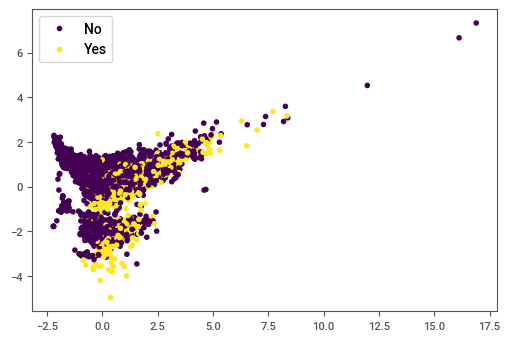

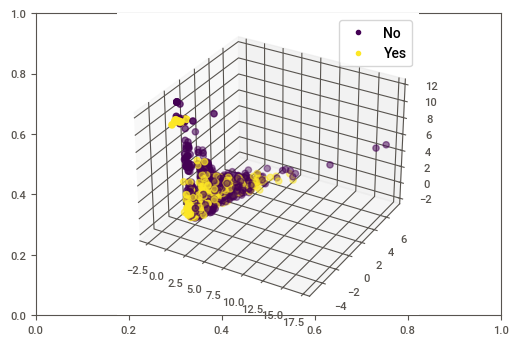

In [59]:
visualize_2pcs(data_reduced, y)
visualize_3pcs(data_reduced, y)

## Elbow visualization

In [60]:
from sklearn.cluster import KMeans

In [61]:
def visualize_elbow(X, ks):
    fig, ax = plt.subplots()
    inertias = []
    for k in ks:
        km = KMeans(n_clusters=k, random_state=10).fit(X)  # YOUR CODE HERE
        inertias.append(km.inertia_)  # YOUR CODE HERE
    plt.plot(ks, inertias)
    plt.xticks(ks)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow plot')

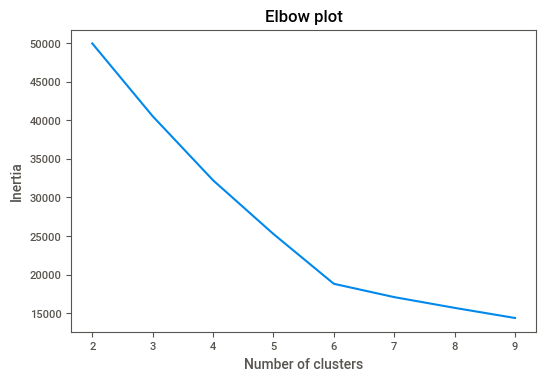

In [62]:
visualize_elbow(data_reduced, range(2, 10))

### With Elbow method the ideal number of clusters is 6

In [63]:
from utils import visualize_silhouette

For n_clusters = 2 The average silhouette_score is : 0.40181700005290627
For n_clusters = 3 The average silhouette_score is : 0.34523837912780164
For n_clusters = 4 The average silhouette_score is : 0.3929088456502407
For n_clusters = 5 The average silhouette_score is : 0.40900706318995483
For n_clusters = 6 The average silhouette_score is : 0.4380909531721202
For n_clusters = 7 The average silhouette_score is : 0.39814053912886915
For n_clusters = 8 The average silhouette_score is : 0.38669143568965736


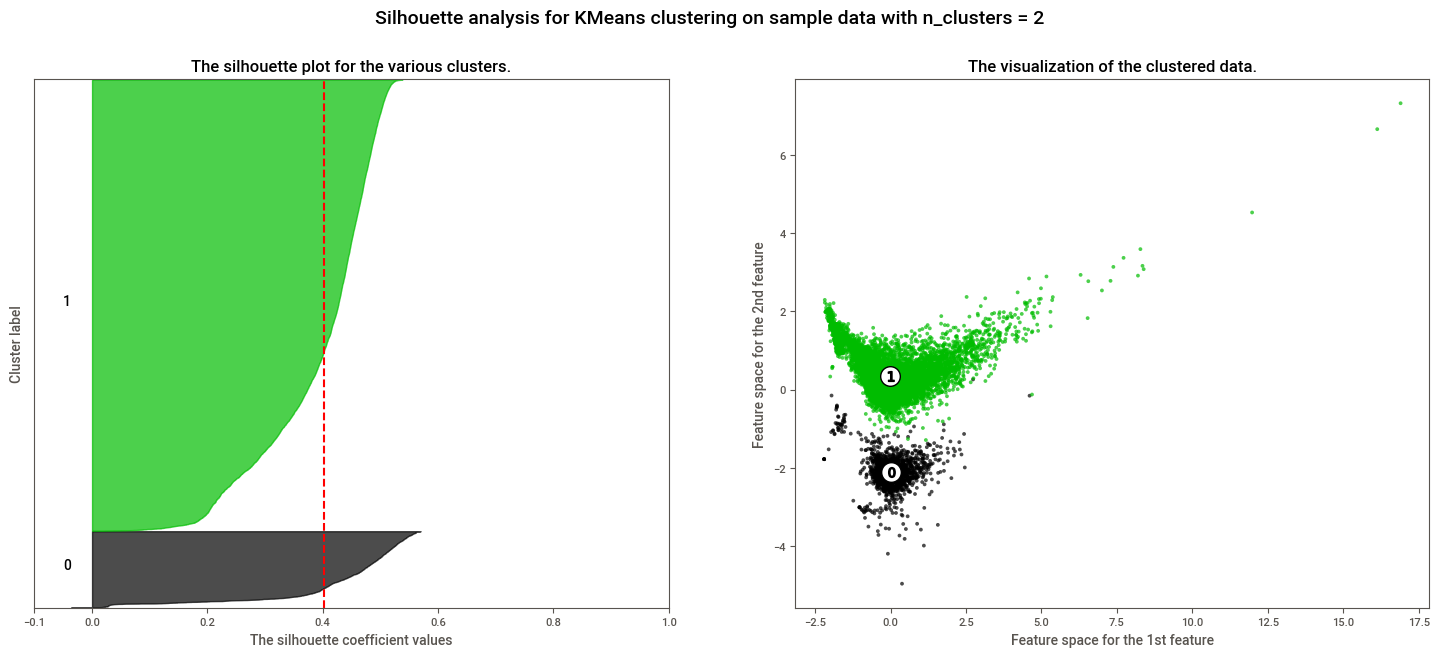

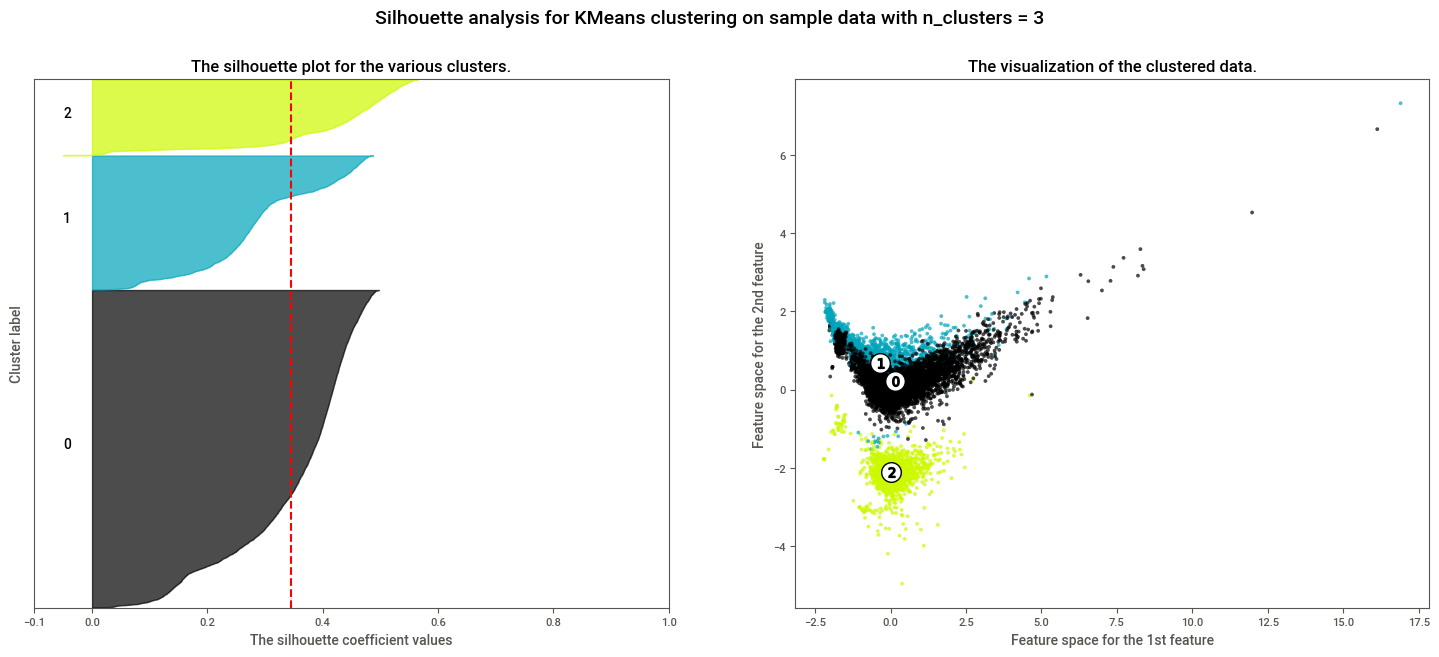

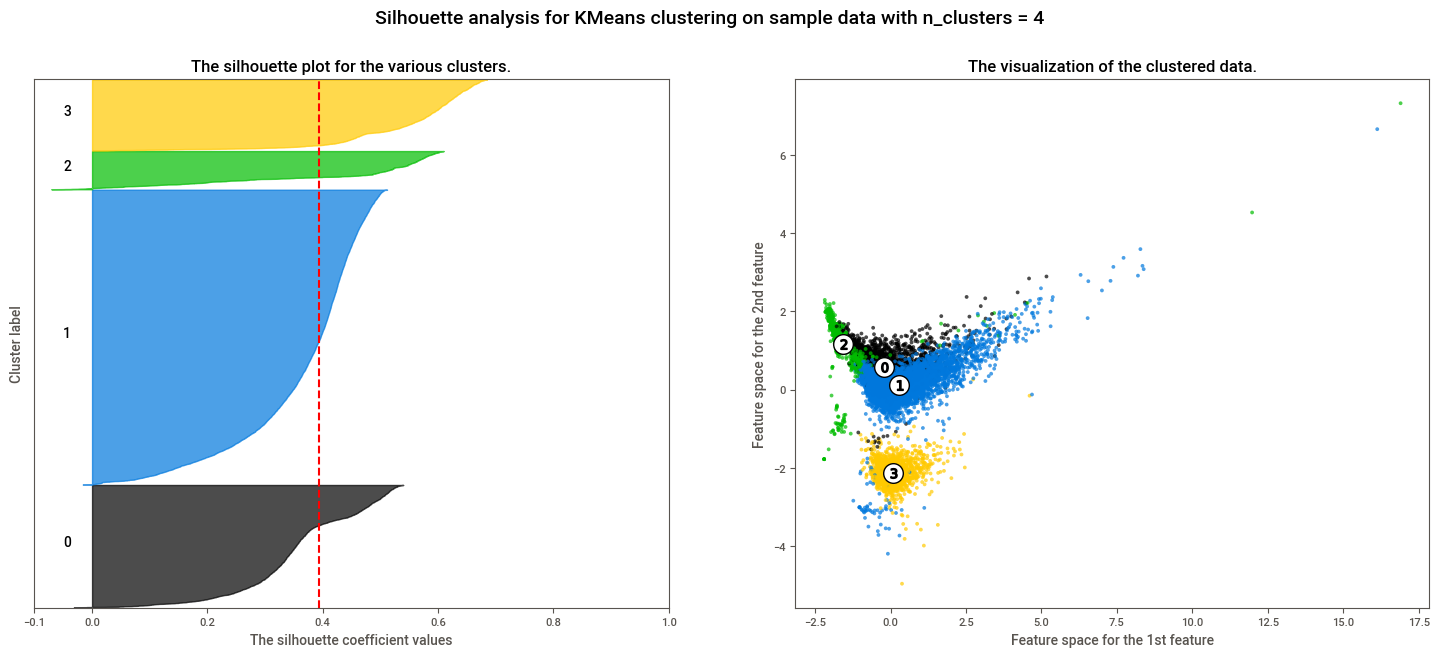

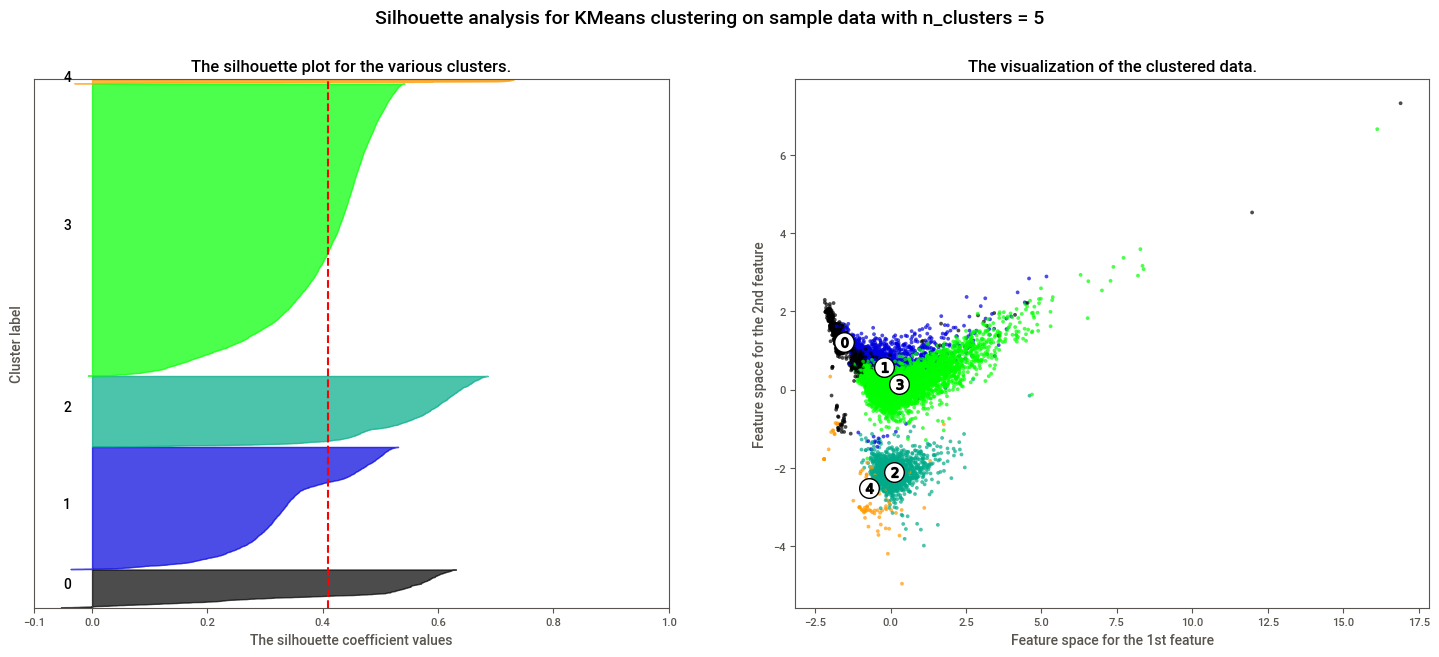

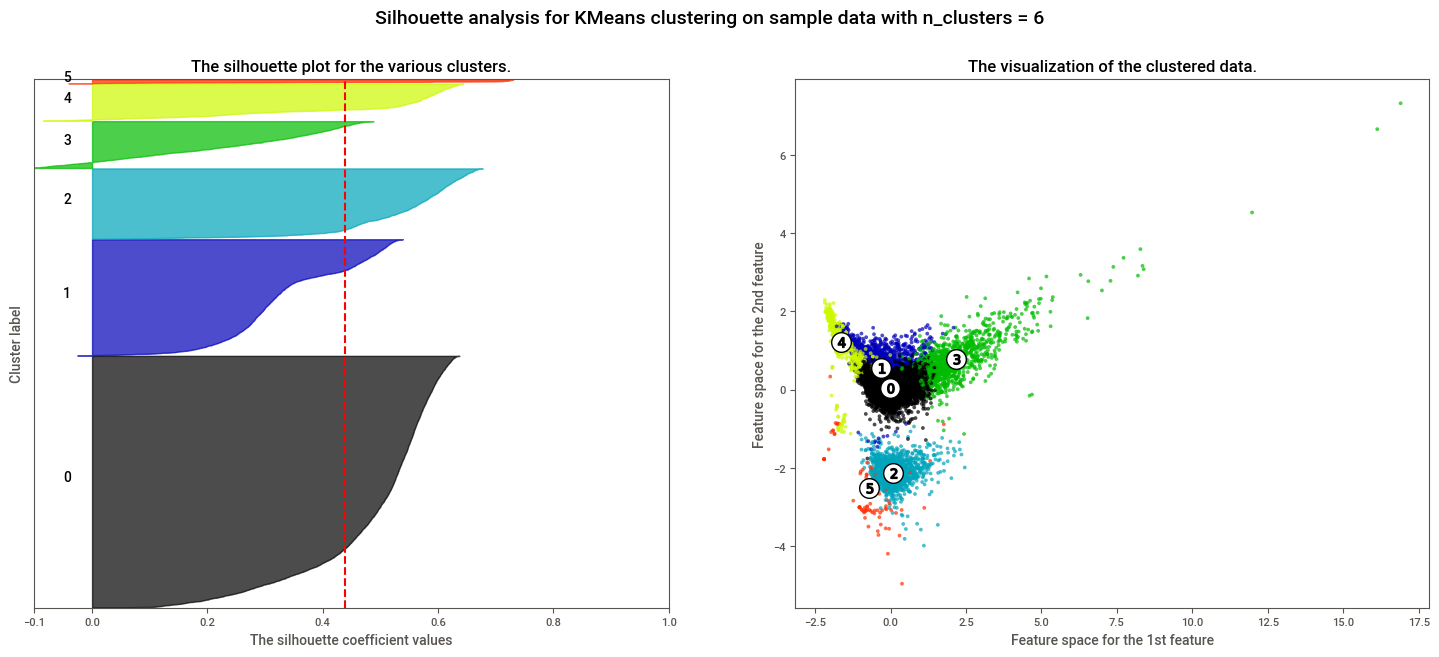

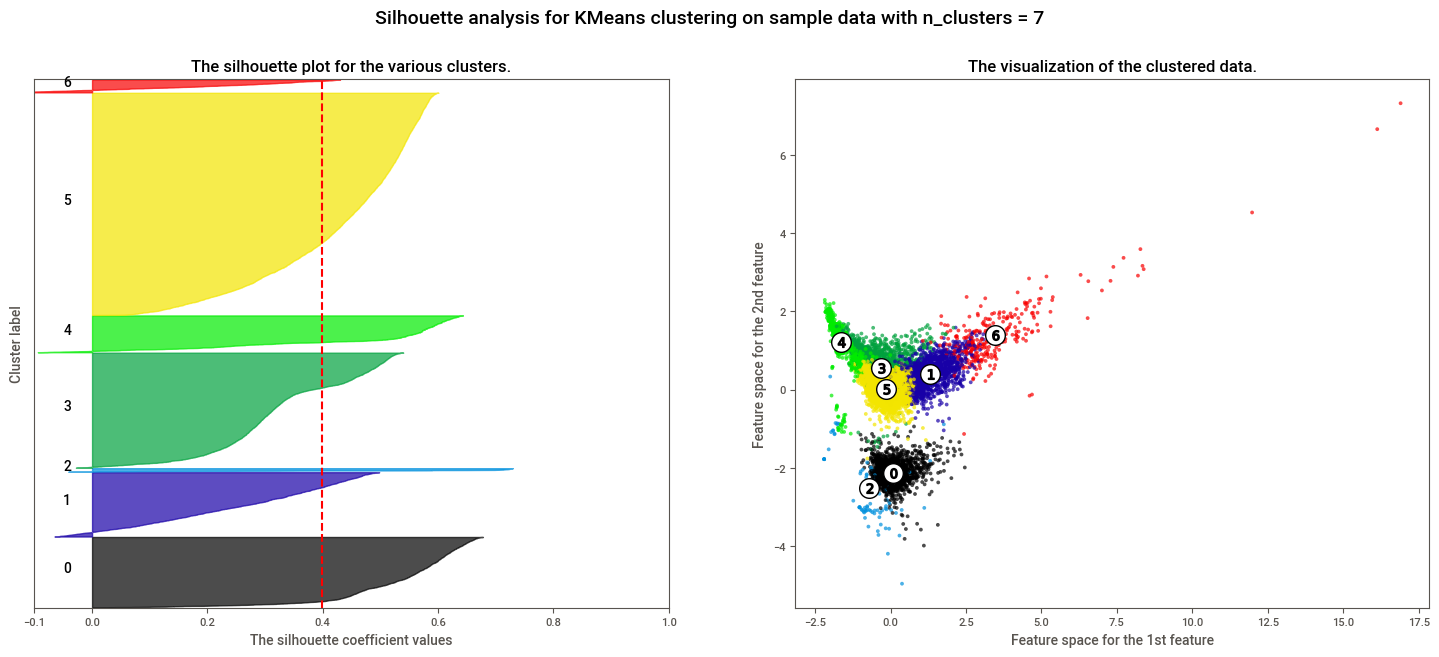

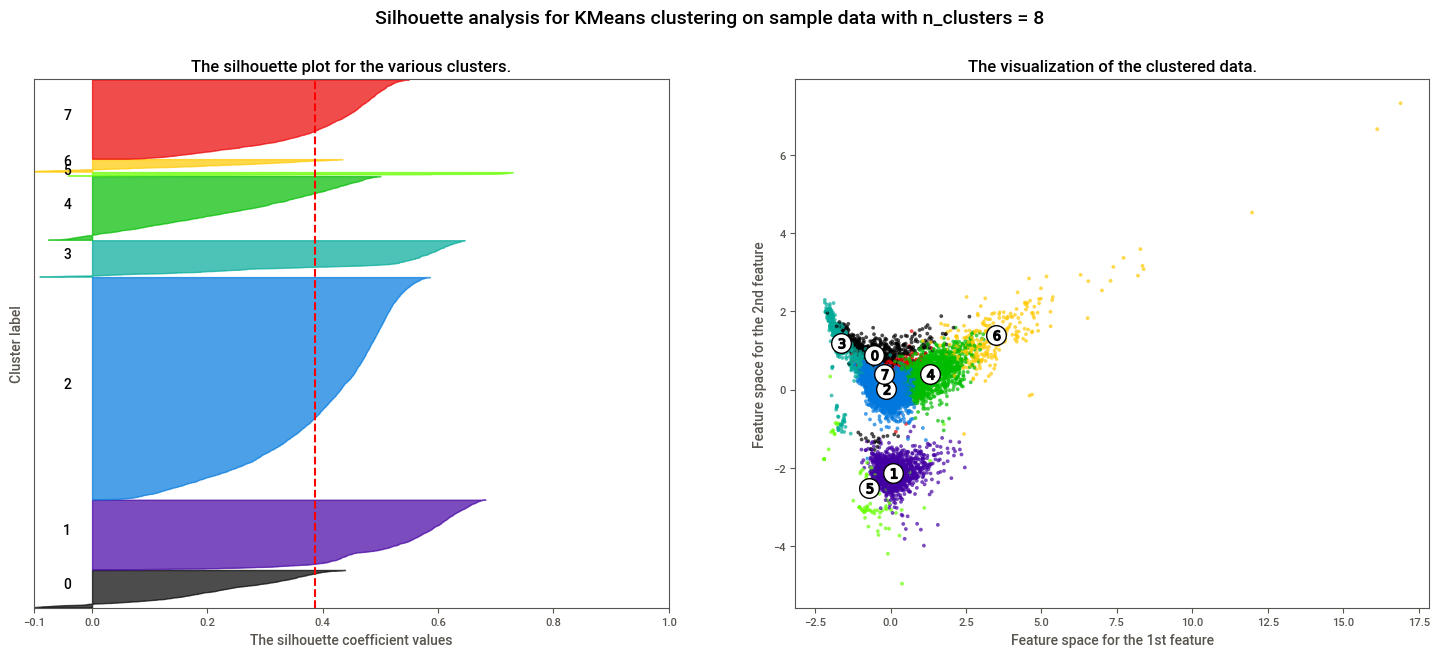

In [64]:
visualize_silhouette(8, data_reduced)

### The Silhouette method also give optimal number of clusters = 6

(For n_clusters = 6 The average silhouette_score is : 0.4273725156840818)

In [65]:
km = KMeans(n_clusters=6, random_state=10).fit(data_reduced)

The size of each cluster is:

In [66]:
np.bincount(km.labels_)

array([5900, 2726, 1652, 1099,  869,   84])

In [67]:
data.shape

(12330, 18)

In [68]:
data['cluster_pca'] = km.labels_

In [69]:
data.shape

(12330, 19)

In [70]:
for i in range(0, len(np.unique(km.labels_))):
    
    label_x = data.loc[(data['cluster_pca'] == i)]
    print('Label ', i ,'count', label_x['Revenue'].count(),'Revenue mean', np.round(label_x['Revenue'].mean(), 3))


Label  0 count 5900 Revenue mean 0.148
Label  1 count 2726 Revenue mean 0.097
Label  2 count 1652 Revenue mean 0.254
Label  3 count 1099 Revenue mean 0.3
Label  4 count 869 Revenue mean 0.005
Label  5 count 84 Revenue mean 0.19


In [71]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,cluster_pca
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,4
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,4
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,4
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,0


In [72]:
data_copy = data.copy(deep =True)

In [73]:
df_mapping = pd.DataFrame({'Month': ['Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov',  'Dec']})

In [74]:
sort_mapping = df_mapping.reset_index().set_index('Month')

In [75]:
data_copy['Month_num'] = data_copy['Month'].map(sort_mapping['index'])

In [76]:
data_copy.sort_values('Month_num', inplace=True)

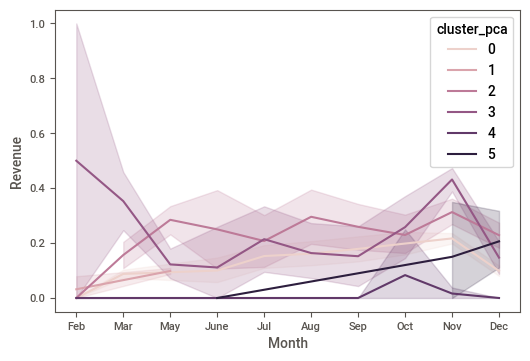

In [77]:
sns.lineplot(data=data_copy, x="Month", y="Revenue", hue='cluster_pca', sort=True);

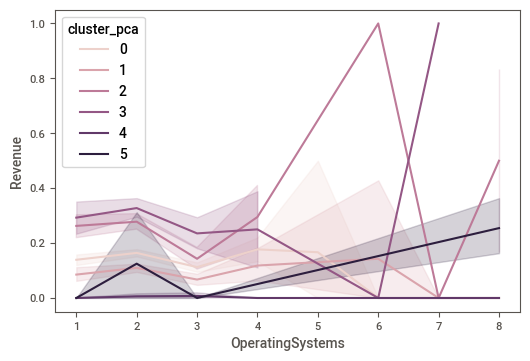

In [78]:
sns.lineplot(data=data_copy, x="OperatingSystems", y="Revenue", hue='cluster_pca', sort=True);

My Questions to the reviwer are:
   How can I get business insights from the clusters, is there any good article about it?

## Task 3. Semi-Supervised Learning

For this task we will utilize a Label Spreading technic. The Scikit-learn LabelSpreading

In [79]:
data = pd.read_csv('dat/online_shoppers_intention.csv.gz')

In [80]:
data['Revenue'].replace({False: 0, True: 1}, inplace=True)

In [81]:
data['Weekend'].replace({False: 0, True: 1}, inplace=True)

In [82]:
data['VisitorType'].replace({'Returning_Visitor': 0, 'New_Visitor': 1, 'Other': 2}, inplace=True)


In [83]:
data.shape

(12330, 18)

In [84]:
train_data = data[data['Month'].isin(['June', 'Jul', 'Aug', 'Sep'])].copy()
train_data.drop(columns='Month', inplace=True)

In [85]:
test_data = data[data['Month'].isin(['Oct', 'Nov','Dec'])].copy()
test_data.drop(columns='Month', inplace=True)

In [86]:
print(train_data.shape)
print(test_data.shape)

(1601, 17)
(5274, 17)


As we already know, there is not much data from the months used to spread the labels.

In [87]:
y_train = train_data['Revenue']

In [88]:
X_train = train_data.drop(columns='Revenue')

In [89]:
X_test = test_data.drop(columns='Revenue')

In [90]:
y_test = test_data['Revenue']

In [91]:
X_test.shape

(5274, 16)

In [92]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [93]:
X = np.concatenate((X_train, X_test))

Concatenate X_ train and X_test to use in LabelSpreading

In [94]:
X.shape

(6875, 16)

Create a label array y, concatenating the labels from y_train with a vector of -1s. This will be used by the algorithm to indicate the data that needs to be labed.

In [95]:
y = np.concatenate((y_train, np.full(y_test.shape, fill_value=-1)), axis=0)

In [96]:
y.shape

(6875,)

In [97]:
from sklearn.semi_supervised import LabelSpreading

label_prop = LabelSpreading(kernel='knn', alpha=0.01)

label_prop.fit(X, y)

LabelSpreading(alpha=0.01, kernel='knn')

In [98]:
semi_sup_preds =  label_prop.transduction_[X_train.shape[0]:]

In [99]:
semi_sup_preds.shape

(5274,)

In [100]:
print(classification_report(y_test, semi_sup_preds))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      4183
           1       0.50      0.34      0.40      1091

    accuracy                           0.79      5274
   macro avg       0.67      0.63      0.64      5274
weighted avg       0.77      0.79      0.78      5274



The self labeling technic is not very impressive

Classification report for Feb-Mar WITHOUT self labeling from Oct-Dec:

In [101]:
test_data_feb = data[data['Month'].isin(['Feb', 'Mar'])].copy()
test_data_feb.drop(columns='Month', inplace=True)

In [102]:
y_test_feb = test_data_feb['Revenue']
X_test_feb = test_data_feb.drop(columns='Revenue')

In [103]:

X_test_feb = scaler.transform(X_test_feb)


In [104]:
lr_model = LogisticRegression(random_state=0, class_weight='balanced').fit(X_train, y_train)
y_pred = lr_model.predict(X_test_feb)
print(classification_report(y_test_feb, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1896
           1       0.57      0.87      0.69       195

    accuracy                           0.93      2091
   macro avg       0.78      0.90      0.82      2091
weighted avg       0.95      0.93      0.93      2091



In [105]:
y_test_feb.shape

(2091,)

### Now, lets use the self labeled data

Classification report for Feb-Mar WITH self labeling from Oct-Dec

In [106]:
semi_sup_labels =  label_prop.transduction_

In [107]:
semi_sup_labels.shape

(6875,)

In [108]:
lr_model = LogisticRegression(random_state=0, class_weight='balanced').fit(X, semi_sup_labels)
y_pred_1 = lr_model.predict(X_test_feb)
print(classification_report(y_test_feb, y_pred_1))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      1896
           1       0.54      0.83      0.66       195

    accuracy                           0.92      2091
   macro avg       0.76      0.88      0.80      2091
weighted avg       0.94      0.92      0.93      2091



In [109]:
y_pred_1.mean()

0.14299378287900527

In [110]:
semi_sup_labels.mean()

0.14327272727272727

In the present case, the self supervised technic did not improve the model performance.
Probable causes:
The labeled data is small compared to the unlabeled data.
The test months data (Feb-Mar) is not representative of the global tendency.
